In [1]:
!nvidia-smi

Sat May  8 06:55:27 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    26W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# !unzip -q bt.zip
# !pip install scikit-plot scipy==1.2.0

In [8]:
import os
import time
import torch
import pickle
import numpy as np
import pandas as pd
from bt.data import *
import torch.nn as nn
from bt.models import *
from bt.utils import *
from torchvision import transforms
import torchvision.utils as vutils
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import KFold, train_test_split
from torchvision.models import inception_v3, resnet50, vgg16, vgg16_bn

In [9]:
inception_v3()

c:\program files\python37\lib\site-packages\torchvision\models\inception.py:77: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  ' due to scipy/scipy#11299), please set init_weights=True.', FutureWarning)


Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [5]:
batch_size = 32

n_classes = 3

epochs = 1

lr = 3e-4

num_workers = 4

image_size = (224, 224)

class_names = ['Glioma', 'Meningioma', 'Pituitary']

images_dir = 'data/'
model_dir = 'models/'

os.makedirs(model_dir, exist_ok=True)

df = pd.DataFrame(columns=['model', 'accuracy', 'loss', 'precision_class_wise', 'precision_avg', 'recall_class_wise', 'recall_avg', 'f1_class_wise', 'f1_avg'])

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 

In [6]:
dataset = ImageFolder(root=images_dir)

In [7]:
kfold = KFold(n_splits=5, shuffle=True, random_state=101) 

FOLD 1


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.564968  Accuracy: 12.500000%
Epoch:  1  batch:      3 [     3/77]  Loss: 1.823306  Accuracy: 30.208333%
Epoch:  1  batch:      5 [     5/77]  Loss: 0.963159  Accuracy: 38.125000%
Epoch:  1  batch:      7 [     7/77]  Loss: 0.996388  Accuracy: 39.285714%
Epoch:  1  batch:      9 [     9/77]  Loss: 0.831441  Accuracy: 43.402778%
Epoch:  1  batch:     11 [    11/77]  Loss: 0.927494  Accuracy: 47.727273%
Epoch:  1  batch:     13 [    13/77]  Loss: 0.951798  Accuracy: 48.076923%
Epoch:  1  batch:     15 [    15/77]  Loss: 0.993125  Accuracy: 48.958333%
Epoch:  1  batch:     17 [    17/77]  Loss: 0.785014  Accuracy: 50.735294%
Epoch:  1  batch:     19 [    19/77]  Loss: 1.033377  Accuracy: 50.986842%
Epoch:  1  batch:     21 [    21/77]  Loss: 0.831384  Accuracy: 51.785714%
Epoch:  1  batch:     23 [    23/77]  Loss: 0.712511  Accuracy: 54.076087%
Epoch:  1  batch:     25 [    25/77]  Loss: 0.787505  Accuracy: 55.50000

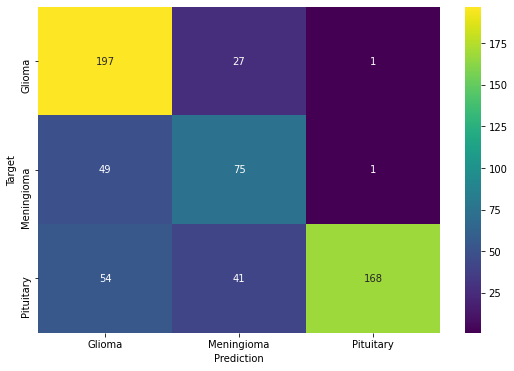


Accuracy Score: 0.7178

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.66      0.88      0.75       225
         1.0       0.52      0.60      0.56       125
         2.0       0.99      0.64      0.78       263

    accuracy                           0.72       613
   macro avg       0.72      0.70      0.70       613
weighted avg       0.77      0.72      0.72       613


Precision Score (Class-Wise): 
[0.65666667 0.52447552 0.98823529]
Average Precision Score: 0.7231258284199461

Recall Score (Class-Wise): 
[0.87555556 0.6        0.63878327]
Average Recall Score: 0.7047796085058442

F1 Score (Class-Wise): 
[0.75047619 0.55970149 0.77598152]
Average F1: 0.6953864024209754

Finished Training

Training Duration 0.66 minutes
GPU memory used : 385667072 kb
GPU memory cached : 1390411776 kb


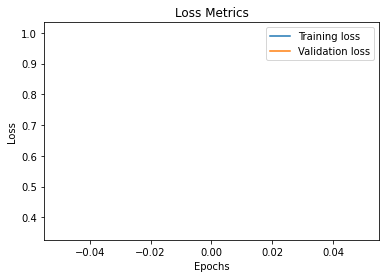

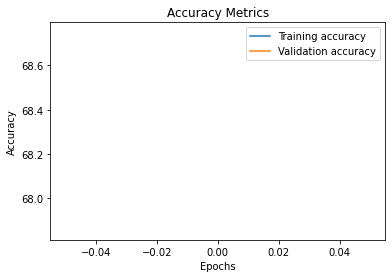

FOLD 2


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.229369  Accuracy: 18.750000%
Epoch:  1  batch:      3 [     3/77]  Loss: 1.131612  Accuracy: 35.416667%
Epoch:  1  batch:      5 [     5/77]  Loss: 0.792026  Accuracy: 45.000000%
Epoch:  1  batch:      7 [     7/77]  Loss: 1.038002  Accuracy: 50.000000%
Epoch:  1  batch:      9 [     9/77]  Loss: 0.903039  Accuracy: 53.125000%
Epoch:  1  batch:     11 [    11/77]  Loss: 0.979176  Accuracy: 55.113636%
Epoch:  1  batch:     13 [    13/77]  Loss: 0.765865  Accuracy: 57.211538%
Epoch:  1  batch:     15 [    15/77]  Loss: 1.020647  Accuracy: 58.750000%
Epoch:  1  batch:     17 [    17/77]  Loss: 1.045231  Accuracy: 59.191176%
Epoch:  1  batch:     19 [    19/77]  Loss: 0.900025  Accuracy: 59.703947%
Epoch:  1  batch:     21 [    21/77]  Loss: 0.916462  Accuracy: 60.565476%
Epoch:  1  batch:     23 [    23/77]  Loss: 0.913509  Accuracy: 60.054348%
Epoch:  1  batch:     25 [    25/77]  Loss: 0.442158  Accuracy: 61.25000

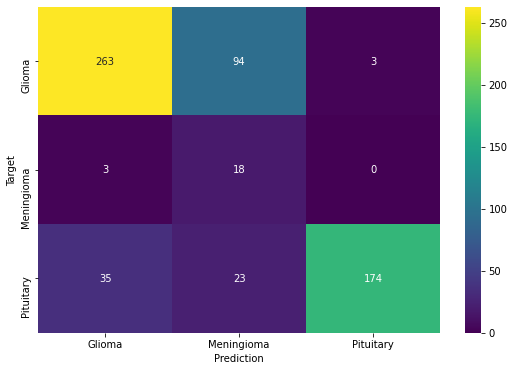


Accuracy Score: 0.7423

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.87      0.73      0.80       360
         1.0       0.13      0.86      0.23        21
         2.0       0.98      0.75      0.85       232

    accuracy                           0.74       613
   macro avg       0.66      0.78      0.63       613
weighted avg       0.89      0.74      0.80       613


Precision Score (Class-Wise): 
[0.87375415 0.13333333 0.98305085]
Average Precision Score: 0.6633794445382936

Recall Score (Class-Wise): 
[0.73055556 0.85714286 0.75      ]
Average Recall Score: 0.7792328042328043

F1 Score (Class-Wise): 
[0.79576399 0.23076923 0.85085575]
Average F1: 0.6257963234796883

Finished Training

Training Duration 0.65 minutes
GPU memory used : 396087296 kb
GPU memory cached : 1396703232 kb


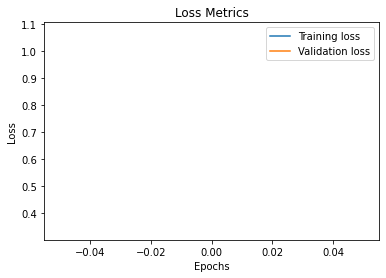

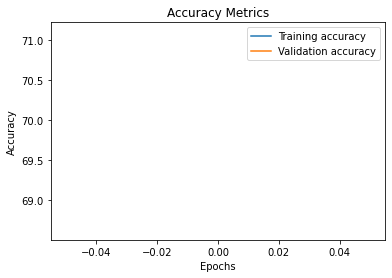

FOLD 3


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.599789  Accuracy: 18.750000%
Epoch:  1  batch:      3 [     3/77]  Loss: 1.123793  Accuracy: 43.750000%
Epoch:  1  batch:      5 [     5/77]  Loss: 0.869684  Accuracy: 51.875000%
Epoch:  1  batch:      7 [     7/77]  Loss: 1.095833  Accuracy: 54.017857%
Epoch:  1  batch:      9 [     9/77]  Loss: 0.865914  Accuracy: 53.472222%
Epoch:  1  batch:     11 [    11/77]  Loss: 0.654353  Accuracy: 57.670455%
Epoch:  1  batch:     13 [    13/77]  Loss: 1.161160  Accuracy: 59.134615%
Epoch:  1  batch:     15 [    15/77]  Loss: 0.735752  Accuracy: 60.416667%
Epoch:  1  batch:     17 [    17/77]  Loss: 0.981927  Accuracy: 61.213235%
Epoch:  1  batch:     19 [    19/77]  Loss: 0.490352  Accuracy: 62.335526%
Epoch:  1  batch:     21 [    21/77]  Loss: 0.798056  Accuracy: 63.392857%
Epoch:  1  batch:     23 [    23/77]  Loss: 0.686352  Accuracy: 63.994565%
Epoch:  1  batch:     25 [    25/77]  Loss: 0.667892  Accuracy: 63.87500

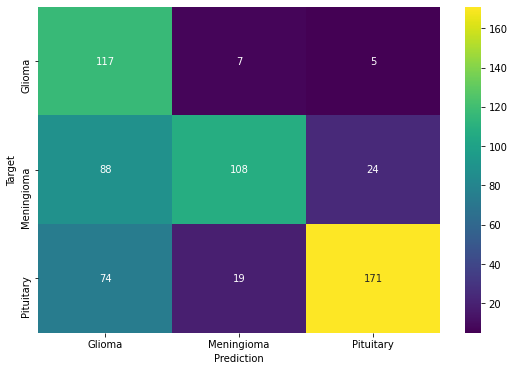


Accuracy Score: 0.6460

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.42      0.91      0.57       129
         1.0       0.81      0.49      0.61       220
         2.0       0.85      0.65      0.74       264

    accuracy                           0.65       613
   macro avg       0.69      0.68      0.64       613
weighted avg       0.75      0.65      0.66       613


Precision Score (Class-Wise): 
[0.41935484 0.80597015 0.855     ]
Average Precision Score: 0.6934416626544696

Recall Score (Class-Wise): 
[0.90697674 0.49090909 0.64772727]
Average Recall Score: 0.6818710359408033

F1 Score (Class-Wise): 
[0.57352941 0.61016949 0.73706897]
Average F1: 0.6402559562691237

Finished Training

Training Duration 0.65 minutes
GPU memory used : 391696384 kb
GPU memory cached : 1396703232 kb


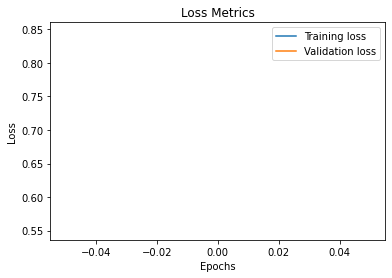

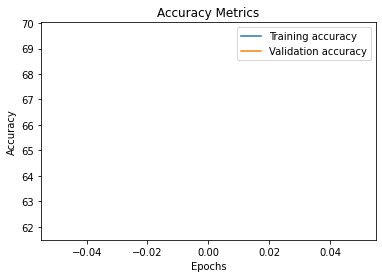

FOLD 4


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.310361  Accuracy: 28.125000%
Epoch:  1  batch:      3 [     3/77]  Loss: 1.048394  Accuracy: 46.875000%
Epoch:  1  batch:      5 [     5/77]  Loss: 1.544846  Accuracy: 48.125000%
Epoch:  1  batch:      7 [     7/77]  Loss: 1.084787  Accuracy: 49.107143%
Epoch:  1  batch:      9 [     9/77]  Loss: 0.800318  Accuracy: 51.736111%
Epoch:  1  batch:     11 [    11/77]  Loss: 0.739428  Accuracy: 52.556818%
Epoch:  1  batch:     13 [    13/77]  Loss: 0.857339  Accuracy: 55.528846%
Epoch:  1  batch:     15 [    15/77]  Loss: 0.880293  Accuracy: 57.291667%
Epoch:  1  batch:     17 [    17/77]  Loss: 0.658261  Accuracy: 58.272059%
Epoch:  1  batch:     19 [    19/77]  Loss: 0.852454  Accuracy: 59.375000%
Epoch:  1  batch:     21 [    21/77]  Loss: 0.534544  Accuracy: 60.267857%
Epoch:  1  batch:     23 [    23/77]  Loss: 0.861586  Accuracy: 61.005435%
Epoch:  1  batch:     25 [    25/77]  Loss: 0.532327  Accuracy: 61.50000

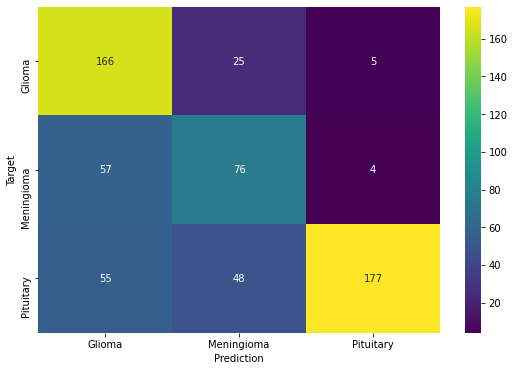


Accuracy Score: 0.6835

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.60      0.85      0.70       196
         1.0       0.51      0.55      0.53       137
         2.0       0.95      0.63      0.76       280

    accuracy                           0.68       613
   macro avg       0.69      0.68      0.66       613
weighted avg       0.74      0.68      0.69       613


Precision Score (Class-Wise): 
[0.5971223  0.51006711 0.9516129 ]
Average Precision Score: 0.6862674398260132

Recall Score (Class-Wise): 
[0.84693878 0.55474453 0.63214286]
Average Recall Score: 0.6779420527335022

F1 Score (Class-Wise): 
[0.70042194 0.53146853 0.75965665]
Average F1: 0.6638490415857722

Finished Training

Training Duration 0.65 minutes
GPU memory used : 393990144 kb
GPU memory cached : 1396703232 kb


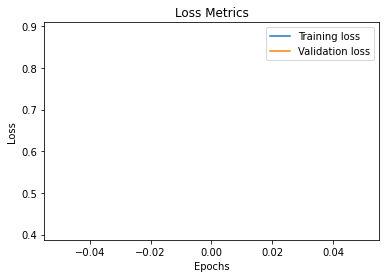

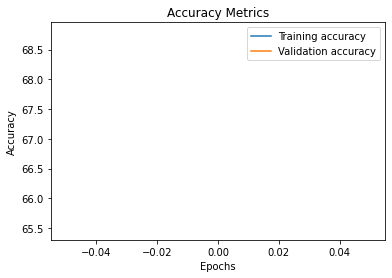

FOLD 5


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.073522  Accuracy: 53.125000%
Epoch:  1  batch:      3 [     3/77]  Loss: 1.128951  Accuracy: 53.125000%
Epoch:  1  batch:      5 [     5/77]  Loss: 1.007088  Accuracy: 53.125000%
Epoch:  1  batch:      7 [     7/77]  Loss: 0.772340  Accuracy: 55.803571%
Epoch:  1  batch:      9 [     9/77]  Loss: 0.823425  Accuracy: 55.902778%
Epoch:  1  batch:     11 [    11/77]  Loss: 0.693635  Accuracy: 56.818182%
Epoch:  1  batch:     13 [    13/77]  Loss: 0.954039  Accuracy: 57.692308%
Epoch:  1  batch:     15 [    15/77]  Loss: 0.757562  Accuracy: 59.791667%
Epoch:  1  batch:     17 [    17/77]  Loss: 0.634667  Accuracy: 60.477941%
Epoch:  1  batch:     19 [    19/77]  Loss: 0.639775  Accuracy: 61.184211%
Epoch:  1  batch:     21 [    21/77]  Loss: 0.600425  Accuracy: 62.202381%
Epoch:  1  batch:     23 [    23/77]  Loss: 0.821970  Accuracy: 63.043478%
Epoch:  1  batch:     25 [    25/77]  Loss: 0.596895  Accuracy: 64.00000

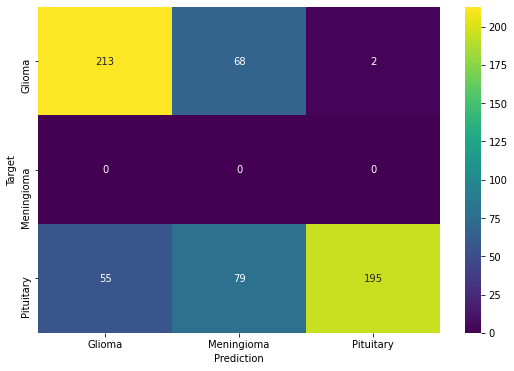


Accuracy Score: 0.6667

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.79      0.75      0.77       283
         1.0       0.00      0.00      0.00         0
         2.0       0.99      0.59      0.74       329

    accuracy                           0.67       612
   macro avg       0.59      0.45      0.50       612
weighted avg       0.90      0.67      0.76       612


Precision Score (Class-Wise): 
[0.79477612 0.         0.98984772]
Average Precision Score: 0.5948746117130086

Recall Score (Class-Wise): 
[0.75265018 0.         0.59270517]
Average Recall Score: 0.4484517812838991

F1 Score (Class-Wise): 
[0.77313975 0.         0.74144487]
Average F1: 0.5048615376122225

Finished Training

Training Duration 0.65 minutes
GPU memory used : 392744960 kb
GPU memory cached : 1396703232 kb


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


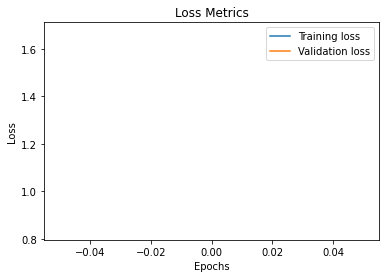

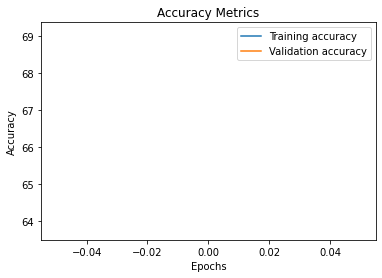

In [8]:
for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):
    # Print
    print(f'FOLD {fold+1}\n')
    
    model_name = f'resnet50_wo_aug_fold_{fold+1}' 
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      dataset, 
                      batch_size=batch_size, sampler=train_subsampler, collate_fn=plain_transform)

    testloader = torch.utils.data.DataLoader(
                      dataset,
                      batch_size=batch_size, sampler=test_subsampler, collate_fn=plain_transform)
    
    model = resnet50()

    model.fc = nn.Linear(model.fc.in_features, 3)
    
    model = model.to(device)
        
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    print('\nTraining the model')
    b, test_b = 0, 0

    training_losses = []
    training_accuracies = []
    test_loss = []
    test_corr = []

    start_time = time.time()

    for epoch in range(epochs):
        e_start = time.time()

        model.train()

        running_loss = 0.0
        running_accuracy = 0.0
        tst_corr = 0.0

        for b, (X_train, y_train) in enumerate(trainloader):
            X_train, y_train = X_train.to(device), y_train.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            y_pred = model(X_train)
            
            y_pred = y_pred.view(-1, n_classes)
            
            loss = criterion(y_pred, y_train)

            predicted = torch.argmax(y_pred.data, dim=1).data
            batch_corr = (predicted == y_train).sum()
            running_accuracy += batch_corr
            
            loss.backward()
            
            optimizer.step()
            
            # print statistics
            running_loss += loss.item()

            if b % int(len(trainloader)/batch_size) == 0:
                print(f'Epoch: {epoch+1:2}  batch: {b+1:6} [{b+1:6}/{len(trainloader)}]  Loss: {loss.item():.6f}  Accuracy: {running_accuracy.item()*100/((batch_size) * (b+1)):.6f}%')
            
        training_losses.append(loss.item())
        training_accuracies.append(running_accuracy.item()*100/((batch_size) * (b+1)))

        print(f"Epoch {epoch+1} | Training Accuracy: {torch.mean(torch.tensor(training_accuracies)):.6f}% | Training Loss: {torch.mean(torch.tensor(training_losses)):.6f}")

        model.eval()
        b = 0

        with torch.no_grad():
            correct = 0
            labels = []
            pred = []

            new_y = 0.0

            # perform test set evaluation batch wise
            for b, (X, y) in enumerate(testloader):
                b += 1
                # set label to use CUDA if available
                X, y = X.to(device), y.to(device)
   
                labels.extend(y.view(-1).cpu().numpy())

                # perform forward pass
                y_val = model(X).view(-1, n_classes)

                # get argmax of predicted values, which is our label
                predicted = torch.argmax(y_val.data, dim=1).view(-1)

                # append predicted label
                pred.extend(predicted.cpu().numpy())

                # calculate loss
                loss = criterion(y_val, y)

                # increment correct with correcly predicted labels per batch
                correct += (predicted == y).sum()

            # append correct samples labels and losses
            test_corr.append(correct.item()*100/(batch_size * b))
            
            test_loss.append(loss.item())
                
        print(f"Test accuracy: {torch.mean(torch.tensor(test_corr)):.6f}% | Test Loss: {torch.mean(torch.tensor(test_loss)):.6f}")

        labels = torch.Tensor(labels)
        pred = torch.Tensor(pred)

    print("Test Metrics: \n")

    plot_confusion_matrix(pred, labels, class_names)

    a, p, p_avg, r, r_avg, f, f_avg = get_all_metrics(pred, labels)
    
    values = {'model': model_name, 'accuracy': a, 'loss': torch.mean(torch.tensor(test_loss)), 'precision_class_wise': p, 'precision_avg': p_avg, 'recall_class_wise': r, 'recall_avg': r_avg, 'f1_class_wise': f, 'f1_avg': f_avg}
    df = df.append(values, ignore_index = True)

    print('Finished Training')

    end_time = time.time() - start_time    

    # print training summary
    print("\nTraining Duration {:.2f} minutes".format(end_time/60))
    print("GPU memory used : {} kb".format(torch.cuda.memory_allocated()))
    print("GPU memory cached : {} kb".format(torch.cuda.memory_reserved()))

    plot_loss(training_losses, test_loss) 
    plot_accuracy(training_accuracies, test_corr) 

    torch.save(model.state_dict(), model_dir + '/' + model_name + f'_fold_{fold}.pt')
    df.to_csv('resnet_test_results.csv', index=False)

FOLD 1


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.058853  Accuracy: 50.000000%
Epoch:  1  batch:    154 [   154/613]  Loss: 0.528208  Accuracy: 56.006494%
Epoch:  1  batch:    307 [   307/613]  Loss: 1.276641  Accuracy: 57.400244%
Epoch:  1  batch:    460 [   460/613]  Loss: 0.340024  Accuracy: 60.040761%
Epoch:  1  batch:    613 [   613/613]  Loss: 0.695153  Accuracy: 62.698817%
Epoch 1 | Training Accuracy: 62.698818% | Training Loss: 0.695153
Test accuracy: 68.912338% | Test Loss: 1.453226
Test accuracy (wo augmentation): 58.116882% | Test Loss: 1.986706
Test Metrics: 



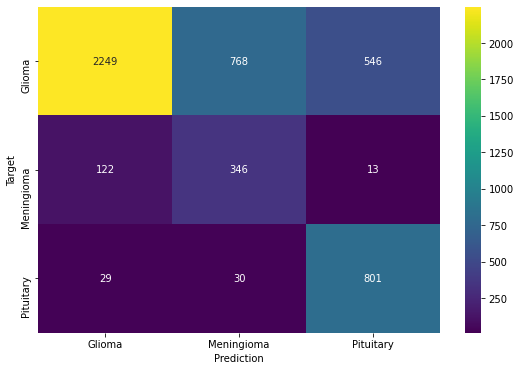


Accuracy Score: 0.6925

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.94      0.63      0.75      3563
         1.0       0.30      0.72      0.43       481
         2.0       0.59      0.93      0.72       860

    accuracy                           0.69      4904
   macro avg       0.61      0.76      0.63      4904
weighted avg       0.81      0.69      0.72      4904


Precision Score (Class-Wise): 
[0.93708333 0.30244755 0.58897059]
Average Precision Score: 0.6095004913387266

Recall Score (Class-Wise): 
[0.63120965 0.71933472 0.93139535]
Average Recall Score: 0.760646574319074

F1 Score (Class-Wise): 
[0.7543183  0.42584615 0.72162162]
Average F1: 0.6339286905424756



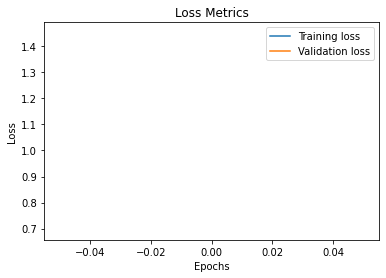

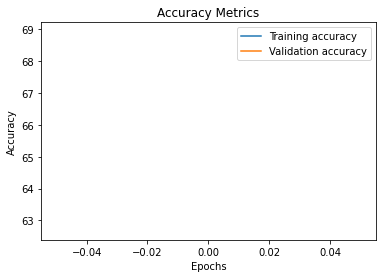

Test Metrics (wo augmentation): 



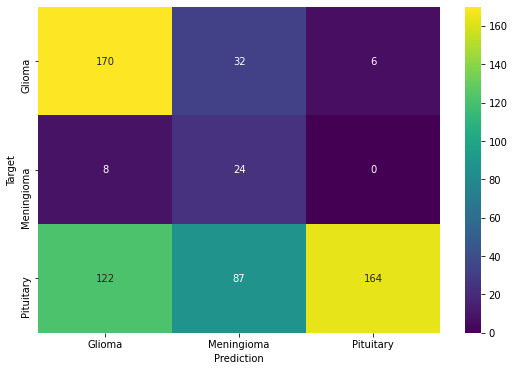


Accuracy Score: 0.5840

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.57      0.82      0.67       208
         1.0       0.17      0.75      0.27        32
         2.0       0.96      0.44      0.60       373

    accuracy                           0.58       613
   macro avg       0.57      0.67      0.52       613
weighted avg       0.79      0.58      0.61       613


Precision Score (Class-Wise): 
[0.56666667 0.16783217 0.96470588]
Average Precision Score: 0.5664015722839252

Recall Score (Class-Wise): 
[0.81730769 0.75       0.43967828]
Average Recall Score: 0.668995325496666

F1 Score (Class-Wise): 
[0.66929134 0.27428571 0.60405157]
Average F1: 0.5158762060819746



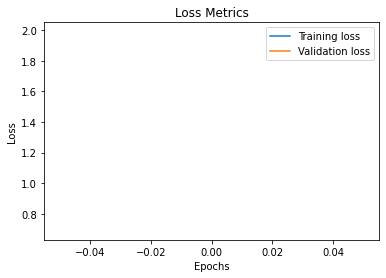

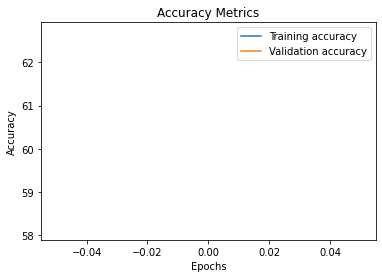

Finished Training

Training Duration 3.55 minutes
GPU memory used : 406310912 kb
GPU memory cached : 4819255296 kb

FOLD 2


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 0.909442  Accuracy: 62.500000%
Epoch:  1  batch:    154 [   154/613]  Loss: 1.134141  Accuracy: 57.893669%
Epoch:  1  batch:    307 [   307/613]  Loss: 0.186628  Accuracy: 61.451547%
Epoch:  1  batch:    460 [   460/613]  Loss: 1.489564  Accuracy: 62.228261%
Epoch:  1  batch:    613 [   613/613]  Loss: 0.506463  Accuracy: 62.714111%
Epoch 1 | Training Accuracy: 62.714111% | Training Loss: 0.506463
Test accuracy: 65.827919% | Test Loss: 0.090713
Test accuracy (wo augmentation): 37.175323% | Test Loss: 0.154278
Test Metrics: 



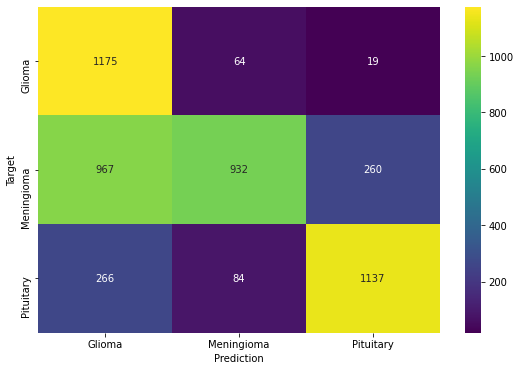


Accuracy Score: 0.6615

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.49      0.93      0.64      1258
         1.0       0.86      0.43      0.58      2159
         2.0       0.80      0.76      0.78      1487

    accuracy                           0.66      4904
   macro avg       0.72      0.71      0.67      4904
weighted avg       0.75      0.66      0.66      4904


Precision Score (Class-Wise): 
[0.48795681 0.86296296 0.8029661 ]
Average Precision Score: 0.7179619584297026

Recall Score (Class-Wise): 
[0.93402226 0.43168133 0.76462677]
Average Recall Score: 0.7101101189339443

F1 Score (Class-Wise): 
[0.64102564 0.57548626 0.78332759]
Average F1: 0.6666131647878076



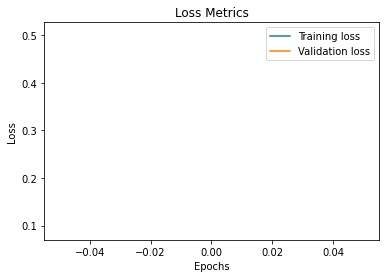

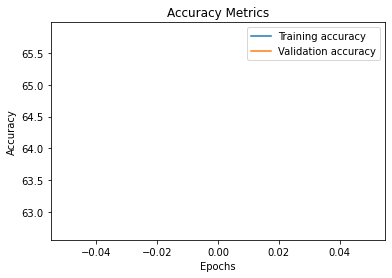

Test Metrics (wo augmentation): 



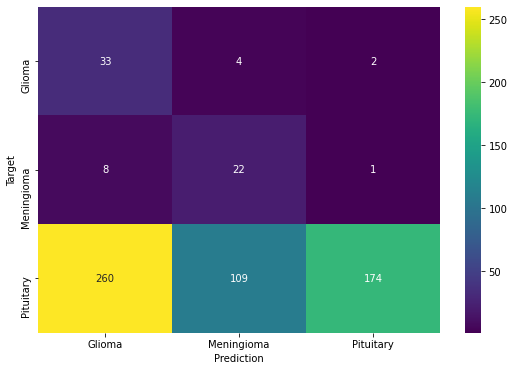


Accuracy Score: 0.3736

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.11      0.85      0.19        39
         1.0       0.16      0.71      0.27        31
         2.0       0.98      0.32      0.48       543

    accuracy                           0.37       613
   macro avg       0.42      0.63      0.31       613
weighted avg       0.89      0.37      0.45       613


Precision Score (Class-Wise): 
[0.10963455 0.16296296 0.98305085]
Average Precision Score: 0.4185494539718689

Recall Score (Class-Wise): 
[0.84615385 0.70967742 0.32044199]
Average Recall Score: 0.625424418152987

F1 Score (Class-Wise): 
[0.19411765 0.26506024 0.48333333]
Average F1: 0.3141704071186708



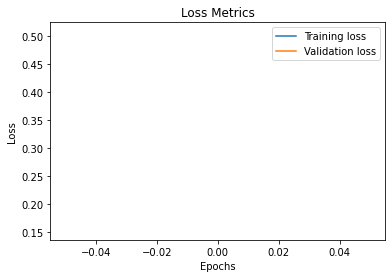

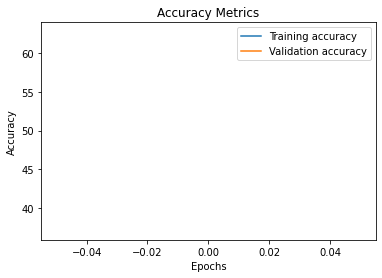

Finished Training

Training Duration 3.54 minutes
GPU memory used : 406573056 kb
GPU memory cached : 4819255296 kb

FOLD 3


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.104420  Accuracy: 31.250000%
Epoch:  1  batch:    154 [   154/613]  Loss: 1.330779  Accuracy: 55.052760%
Epoch:  1  batch:    307 [   307/613]  Loss: 0.837419  Accuracy: 59.324104%
Epoch:  1  batch:    460 [   460/613]  Loss: 0.462302  Accuracy: 62.010870%
Epoch:  1  batch:    613 [   613/613]  Loss: 1.370521  Accuracy: 63.213703%
Epoch 1 | Training Accuracy: 63.213703% | Training Loss: 1.370521
Test accuracy: 72.301140% | Test Loss: 2.549255
Test accuracy (wo augmentation): 48.214287% | Test Loss: 0.032178
Test Metrics: 



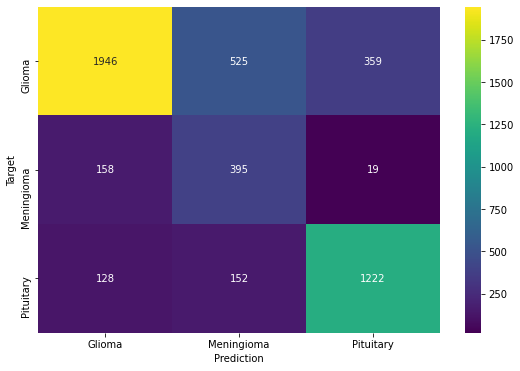


Accuracy Score: 0.7265

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.87      0.69      0.77      2830
         1.0       0.37      0.69      0.48       572
         2.0       0.76      0.81      0.79      1502

    accuracy                           0.73      4904
   macro avg       0.67      0.73      0.68      4904
weighted avg       0.78      0.73      0.74      4904


Precision Score (Class-Wise): 
[0.8718638  0.36847015 0.76375   ]
Average Precision Score: 0.6680279828456285

Recall Score (Class-Wise): 
[0.68763251 0.69055944 0.81358189]
Average Recall Score: 0.7305912800685377

F1 Score (Class-Wise): 
[0.76886606 0.48053528 0.78787879]
Average F1: 0.6790933761765521



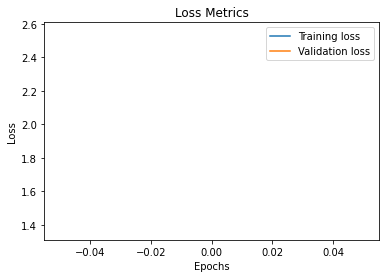

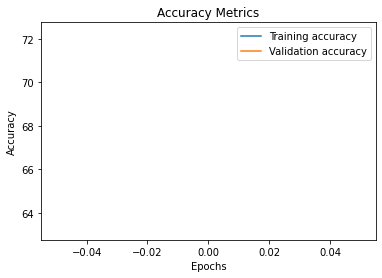

Test Metrics (wo augmentation): 



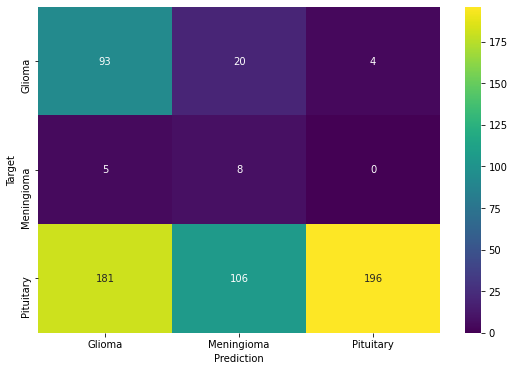


Accuracy Score: 0.4845

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.33      0.79      0.47       117
         1.0       0.06      0.62      0.11        13
         2.0       0.98      0.41      0.57       483

    accuracy                           0.48       613
   macro avg       0.46      0.61      0.38       613
weighted avg       0.84      0.48      0.54       613


Precision Score (Class-Wise): 
[0.33333333 0.05970149 0.98      ]
Average Precision Score: 0.45767827529021554

Recall Score (Class-Wise): 
[0.79487179 0.61538462 0.4057971 ]
Average Recall Score: 0.6053511705685618

F1 Score (Class-Wise): 
[0.46969697 0.10884354 0.57393851]
Average F1: 0.38415967123350514



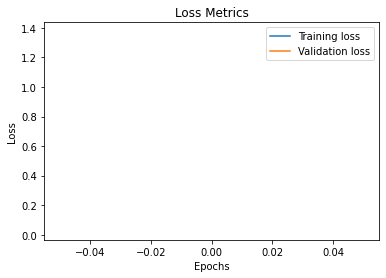

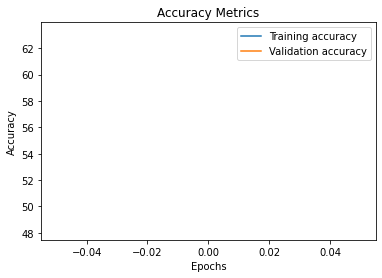

Finished Training

Training Duration 3.53 minutes
GPU memory used : 406310912 kb
GPU memory cached : 4819255296 kb

FOLD 4


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.339946  Accuracy: 0.000000%
Epoch:  1  batch:    154 [   154/613]  Loss: 1.566357  Accuracy: 55.113636%
Epoch:  1  batch:    307 [   307/613]  Loss: 0.570272  Accuracy: 59.334283%
Epoch:  1  batch:    460 [   460/613]  Loss: 0.949709  Accuracy: 61.759511%
Epoch:  1  batch:    613 [   613/613]  Loss: 2.797509  Accuracy: 63.764274%
Epoch 1 | Training Accuracy: 63.764275% | Training Loss: 2.797509
Test accuracy: 57.589287% | Test Loss: 2.359163
Test accuracy (wo augmentation): 60.389610% | Test Loss: 2.689999
Test Metrics: 



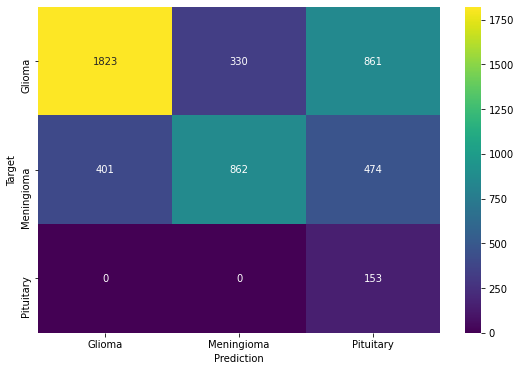


Accuracy Score: 0.5787

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.82      0.60      0.70      3014
         1.0       0.72      0.50      0.59      1737
         2.0       0.10      1.00      0.19       153

    accuracy                           0.58      4904
   macro avg       0.55      0.70      0.49      4904
weighted avg       0.76      0.58      0.64      4904


Precision Score (Class-Wise): 
[0.81969424 0.72315436 0.10282258]
Average Precision Score: 0.5485570625551951

Recall Score (Class-Wise): 
[0.60484406 0.49625792 1.        ]
Average Recall Score: 0.7003673256651585

F1 Score (Class-Wise): 
[0.6960672  0.58859679 0.18647166]
Average F1: 0.4903785518517129



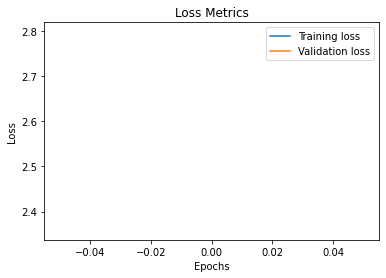

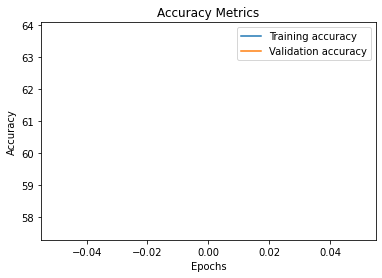

Test Metrics (wo augmentation): 



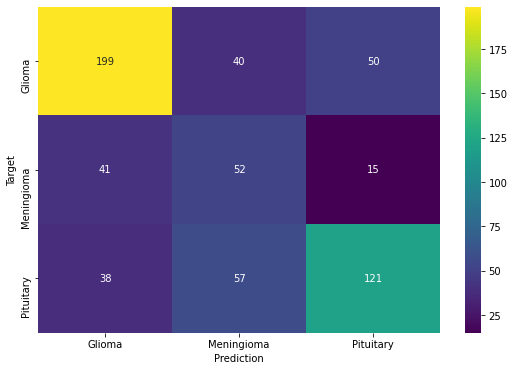


Accuracy Score: 0.6069

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.72      0.69      0.70       289
         1.0       0.35      0.48      0.40       108
         2.0       0.65      0.56      0.60       216

    accuracy                           0.61       613
   macro avg       0.57      0.58      0.57       613
weighted avg       0.63      0.61      0.61       613


Precision Score (Class-Wise): 
[0.71582734 0.34899329 0.65053763]
Average Precision Score: 0.5717860870429008

Recall Score (Class-Wise): 
[0.68858131 0.48148148 0.56018519]
Average Recall Score: 0.5767493271818531

F1 Score (Class-Wise): 
[0.70194004 0.40466926 0.60199005]
Average F1: 0.5695331152416672



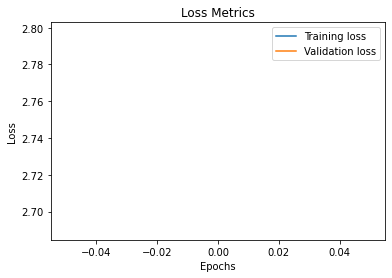

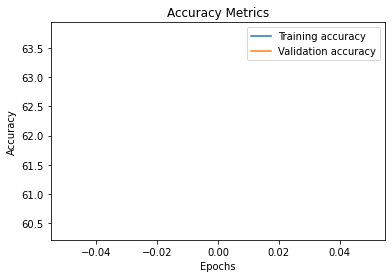

Finished Training

Training Duration 3.52 minutes
GPU memory used : 403165184 kb
GPU memory cached : 4819255296 kb

FOLD 5


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.317083  Accuracy: 28.125000%
Epoch:  1  batch:    154 [   154/613]  Loss: 0.564198  Accuracy: 56.087662%
Epoch:  1  batch:    307 [   307/613]  Loss: 0.184510  Accuracy: 60.128257%
Epoch:  1  batch:    460 [   460/613]  Loss: 1.089499  Accuracy: 62.629076%
Epoch:  1  batch:    613 [   613/613]  Loss: 1.188130  Accuracy: 64.146615%
Epoch 1 | Training Accuracy: 64.146614% | Training Loss: 1.188130
Test accuracy: 65.890526% | Test Loss: 0.617968
Test accuracy (wo augmentation): 56.699345% | Test Loss: 0.302443
Test Metrics: 



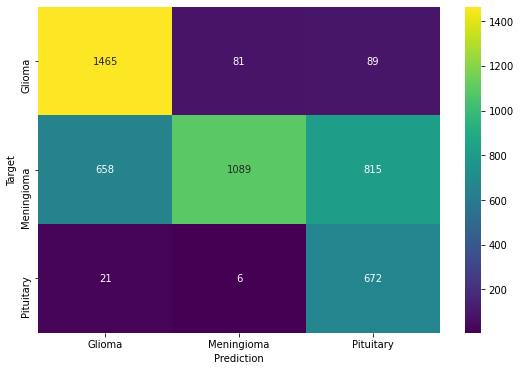


Accuracy Score: 0.6589

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.68      0.90      0.78      1635
         1.0       0.93      0.43      0.58      2562
         2.0       0.43      0.96      0.59       699

    accuracy                           0.66      4896
   macro avg       0.68      0.76      0.65      4896
weighted avg       0.77      0.66      0.65      4896


Precision Score (Class-Wise): 
[0.68330224 0.92602041 0.42639594]
Average Precision Score: 0.67857286201851

Recall Score (Class-Wise): 
[0.89602446 0.42505855 0.96137339]
Average Recall Score: 0.7608188011330372

F1 Score (Class-Wise): 
[0.77533739 0.58266453 0.59076923]
Average F1: 0.6495903826993735



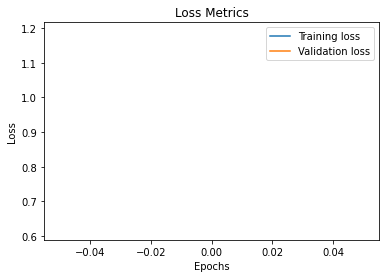

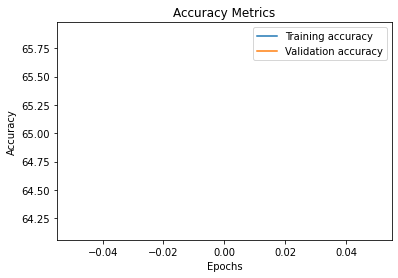

Test Metrics (wo augmentation): 



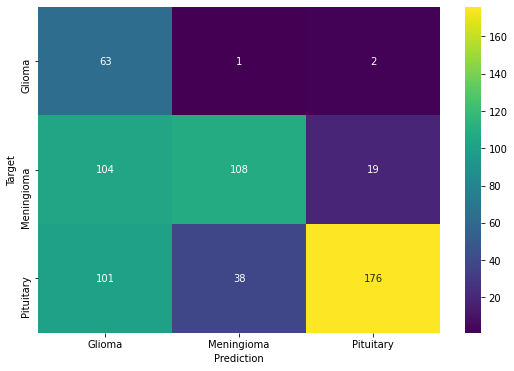


Accuracy Score: 0.5670

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.24      0.95      0.38        66
         1.0       0.73      0.47      0.57       231
         2.0       0.89      0.56      0.69       315

    accuracy                           0.57       612
   macro avg       0.62      0.66      0.55       612
weighted avg       0.76      0.57      0.61       612


Precision Score (Class-Wise): 
[0.23507463 0.73469388 0.89340102]
Average Precision Score: 0.6210565065483729

Recall Score (Class-Wise): 
[0.95454545 0.46753247 0.55873016]
Average Recall Score: 0.6602693602693602

F1 Score (Class-Wise): 
[0.37724551 0.57142857 0.6875    ]
Average F1: 0.5453913601368691



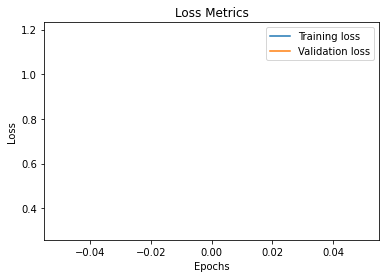

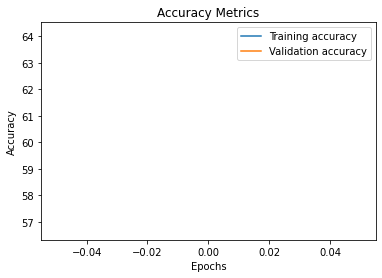

Finished Training

Training Duration 3.52 minutes
GPU memory used : 409522176 kb
GPU memory cached : 4819255296 kb



In [9]:
batch_size = 4 # generates 7 new images + original image - per image, 4 * 8 = 32 images per batch

for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):
    # Print
    print(f'FOLD {fold+1}\n')
    
    model_name = f'resnet50_w_aug_fold_{fold+1}' 
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      dataset, 
                      batch_size=batch_size, sampler=train_subsampler, collate_fn=augmentor)

    testloader = torch.utils.data.DataLoader(
                      dataset,
                      batch_size=batch_size, sampler=test_subsampler, collate_fn=augmentor)
    
    testloader_plain = torch.utils.data.DataLoader(
                      dataset,
                      batch_size=batch_size, sampler=test_subsampler, collate_fn=plain_transform)
    
    model = resnet50()

    model.fc = nn.Linear(model.fc.in_features, 3)
    
    model = model.to(device)
        
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    print('\nTraining the model')
    b, test_b = 0, 0

    training_losses = []
    training_accuracies = []
    test_loss = []
    test_corr = []
    test_corr_a = []
    test_loss_a = []

    start_time = time.time()

    for epoch in range(epochs):
        e_start = time.time()

        model.train()

        running_loss = 0.0
        running_accuracy = 0.0
        tst_corr = 0.0

        for b, (X_train, y_train) in enumerate(trainloader):
            X_train, y_train = X_train.to(device), y_train.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            y_pred = model(X_train)
            
            y_pred = y_pred.view(-1, n_classes)
            
            loss = criterion(y_pred, y_train)

            predicted = torch.argmax(y_pred.data, dim=1).data
            batch_corr = (predicted == y_train).sum()
            running_accuracy += batch_corr
            
            loss.backward()
            
            optimizer.step()
            
            # print statistics
            running_loss += loss.item()

            if b % int(len(trainloader)/batch_size) == 0:
                print(f'Epoch: {epoch+1:2}  batch: {b+1:6} [{b+1:6}/{len(trainloader)}]  Loss: {loss.item():.6f}  Accuracy: {running_accuracy.item()*100/((batch_size * 8) * (b+1)):.6f}%')
            
        training_losses.append(loss.item())
        training_accuracies.append(running_accuracy.item()*100/((batch_size * 8) * (b+1)))

        print(f"Epoch {epoch+1} | Training Accuracy: {torch.mean(torch.tensor(training_accuracies)):.6f}% | Training Loss: {torch.mean(torch.tensor(training_losses)):.6f}")

        model.eval()
        b = 0

        with torch.no_grad():
            correct = 0
            labels = []
            pred = []

            new_y = 0.0

            # perform test set evaluation batch wise
            for b, (X, y) in enumerate(testloader):
                b += 1
                # set label to use CUDA if available
                X, y = X.to(device), y.to(device)
   
                labels.extend(y.view(-1).cpu().numpy())

                # perform forward pass
                y_val = model(X).view(-1, n_classes)

                # get argmax of predicted values, which is our label
                predicted = torch.argmax(y_val.data, dim=1).view(-1)

                # append predicted label
                pred.extend(predicted.cpu().numpy())

                # calculate loss
                loss = criterion(y_val, y)

                # increment correct with correcly predicted labels per batch
                correct += (predicted == y).sum()

            # append correct samples labels and losses
            test_corr.append(correct.item()*100/(batch_size * 8 * b))
            
            test_loss.append(loss.item())
                
        print(f"Test accuracy: {torch.mean(torch.tensor(test_corr)):.6f}% | Test Loss: {torch.mean(torch.tensor(test_loss)):.6f}")

        labels = torch.Tensor(labels)
        pred = torch.Tensor(pred)

        with torch.no_grad():
          correct = 0
          labels_a = []
          pred_a = []

          new_y = 0.0

          # perform test set evaluation batch wise
          for b, (X, y) in enumerate(testloader_plain):
              b += 1
              # set label to use CUDA if available
              X, y = X.to(device), y.to(device)

              labels_a.extend(y.view(-1).cpu().numpy())

              # perform forward pass
              y_val = model(X).view(-1, n_classes)

              # get argmax of predicted values, which is our label
              predicted = torch.argmax(y_val.data, dim=1).view(-1)

              # append predicted label
              pred_a.extend(predicted.cpu().numpy())

              # calculate loss
              loss = criterion(y_val, y)

              # increment correct with correcly predicted labels per batch
              correct += (predicted == y).sum()

          # append correct samples labels and losses
          test_corr_a.append(correct.item()*100/(batch_size * b))

          test_loss_a.append(loss.item())

        labels_a = torch.Tensor(labels_a)
        pred_a = torch.Tensor(pred_a)

        print(f"Test accuracy (wo augmentation): {torch.mean(torch.tensor(test_corr_a)):.6f}% | Test Loss: {torch.mean(torch.tensor(test_loss_a)):.6f}")

    print("Test Metrics: \n")

    plot_confusion_matrix(pred, labels, class_names)

    a, p, p_avg, r, r_avg, f, f_avg = get_all_metrics(pred, labels)
    
    values = {'model': model_name, 'accuracy': a, 'loss': torch.mean(torch.tensor(test_loss)), 'precision_class_wise': p, 'precision_avg': p_avg, 'recall_class_wise': r, 'recall_avg': r_avg, 'f1_class_wise': f, 'f1_avg': f_avg}
    df = df.append(values, ignore_index = True)

    plot_loss(training_losses, test_loss) 
    plot_accuracy(training_accuracies, test_corr)
       
    print("Test Metrics (wo augmentation): \n")

    plot_confusion_matrix(pred_a, labels_a, class_names)

    a, p, p_avg, r, r_avg, f, f_avg = get_all_metrics(pred_a, labels_a)
    
    values = {'model': model_name + '_test_plain', 'accuracy': a, 'loss': torch.mean(torch.tensor(test_loss_a)), 'precision_class_wise': p, 'precision_avg': p_avg, 'recall_class_wise': r, 'recall_avg': r_avg, 'f1_class_wise': f, 'f1_avg': f_avg}
    df = df.append(values, ignore_index = True)

    plot_loss(training_losses, test_loss_a) 
    plot_accuracy(training_accuracies, test_corr_a)
    
    print('Finished Training')

    end_time = time.time() - start_time    

    # print training summary
    print("\nTraining Duration {:.2f} minutes".format(end_time/60))
    print("GPU memory used : {} kb".format(torch.cuda.memory_allocated()))
    print("GPU memory cached : {} kb\n".format(torch.cuda.memory_reserved()))

    torch.save(model.state_dict(), model_dir + '/' + model_name + f'_fold_{fold}.pt')
    df.to_csv('resnet_test_results.csv', index=False)

FOLD 1


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.056513  Accuracy: 46.875000%
Epoch:  1  batch:      3 [     3/77]  Loss: 0.992417  Accuracy: 44.791667%
Epoch:  1  batch:      5 [     5/77]  Loss: 1.079836  Accuracy: 42.500000%
Epoch:  1  batch:      7 [     7/77]  Loss: 1.055869  Accuracy: 43.303571%
Epoch:  1  batch:      9 [     9/77]  Loss: 1.079925  Accuracy: 43.750000%
Epoch:  1  batch:     11 [    11/77]  Loss: 1.103042  Accuracy: 44.034091%
Epoch:  1  batch:     13 [    13/77]  Loss: 1.082453  Accuracy: 42.788462%
Epoch:  1  batch:     15 [    15/77]  Loss: 1.114316  Accuracy: 42.916667%
Epoch:  1  batch:     17 [    17/77]  Loss: 1.124671  Accuracy: 41.544118%
Epoch:  1  batch:     19 [    19/77]  Loss: 1.102057  Accuracy: 41.940789%
Epoch:  1  batch:     21 [    21/77]  Loss: 0.975760  Accuracy: 42.708333%
Epoch:  1  batch:     23 [    23/77]  Loss: 1.048303  Accuracy: 42.934783%
Epoch:  1  batch:     25 [    25/77]  Loss: 1.176704  Accuracy: 42.75000

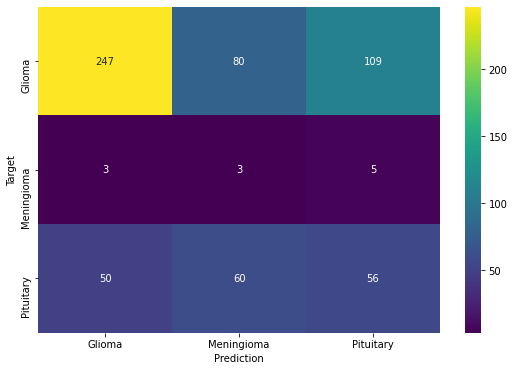


Accuracy Score: 0.4992

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.82      0.57      0.67       436
         1.0       0.02      0.27      0.04        11
         2.0       0.33      0.34      0.33       166

    accuracy                           0.50       613
   macro avg       0.39      0.39      0.35       613
weighted avg       0.68      0.50      0.57       613


Precision Score (Class-Wise): 
[0.82333333 0.02097902 0.32941176]
Average Precision Score: 0.39124137300607886

Recall Score (Class-Wise): 
[0.56651376 0.27272727 0.3373494 ]
Average Recall Score: 0.3921968105951747

F1 Score (Class-Wise): 
[0.67119565 0.03896104 0.33333333]
Average F1: 0.34783000815609516

Finished Training

Training Duration 0.60 minutes
GPU memory used : 104017920 kb
GPU memory cached : 4821352448 kb


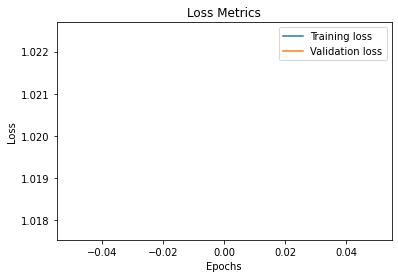

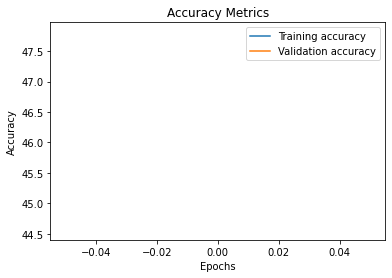

FOLD 2


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.545222  Accuracy: 40.625000%
Epoch:  1  batch:      3 [     3/77]  Loss: 1.037862  Accuracy: 40.625000%
Epoch:  1  batch:      5 [     5/77]  Loss: 1.268531  Accuracy: 37.500000%
Epoch:  1  batch:      7 [     7/77]  Loss: 1.126878  Accuracy: 36.607143%
Epoch:  1  batch:      9 [     9/77]  Loss: 1.182732  Accuracy: 37.500000%
Epoch:  1  batch:     11 [    11/77]  Loss: 1.149674  Accuracy: 39.488636%
Epoch:  1  batch:     13 [    13/77]  Loss: 1.038665  Accuracy: 41.586538%
Epoch:  1  batch:     15 [    15/77]  Loss: 0.984217  Accuracy: 42.916667%
Epoch:  1  batch:     17 [    17/77]  Loss: 1.054928  Accuracy: 43.933824%
Epoch:  1  batch:     19 [    19/77]  Loss: 1.002472  Accuracy: 44.243421%
Epoch:  1  batch:     21 [    21/77]  Loss: 1.077317  Accuracy: 44.345238%
Epoch:  1  batch:     23 [    23/77]  Loss: 1.039760  Accuracy: 44.293478%
Epoch:  1  batch:     25 [    25/77]  Loss: 0.948972  Accuracy: 45.12500

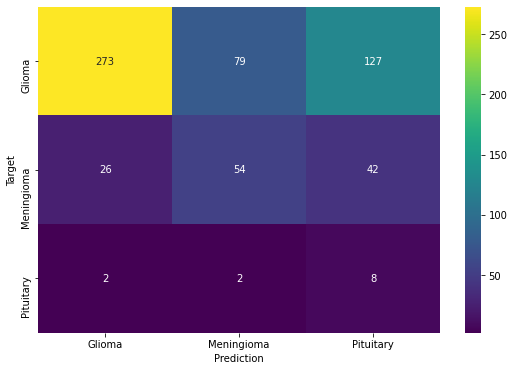


Accuracy Score: 0.5465

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.91      0.57      0.70       479
         1.0       0.40      0.44      0.42       122
         2.0       0.05      0.67      0.08        12

    accuracy                           0.55       613
   macro avg       0.45      0.56      0.40       613
weighted avg       0.79      0.55      0.63       613


Precision Score (Class-Wise): 
[0.90697674 0.4        0.04519774]
Average Precision Score: 0.4507248280996803

Recall Score (Class-Wise): 
[0.56993737 0.44262295 0.66666667]
Average Recall Score: 0.5597423290020572

F1 Score (Class-Wise): 
[0.7        0.42023346 0.08465608]
Average F1: 0.40162984923036804

Finished Training

Training Duration 0.60 minutes
GPU memory used : 101724160 kb
GPU memory cached : 4821352448 kb


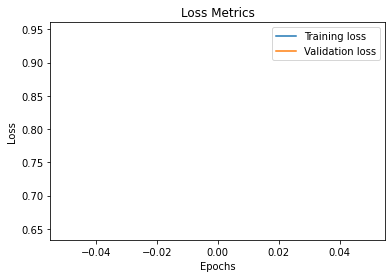

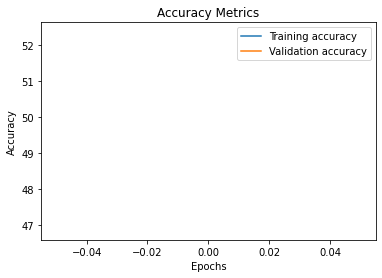

FOLD 3


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.327313  Accuracy: 53.125000%
Epoch:  1  batch:      3 [     3/77]  Loss: 1.093265  Accuracy: 43.750000%
Epoch:  1  batch:      5 [     5/77]  Loss: 1.137029  Accuracy: 40.625000%
Epoch:  1  batch:      7 [     7/77]  Loss: 1.232955  Accuracy: 39.732143%
Epoch:  1  batch:      9 [     9/77]  Loss: 0.911777  Accuracy: 43.055556%
Epoch:  1  batch:     11 [    11/77]  Loss: 1.121964  Accuracy: 43.750000%
Epoch:  1  batch:     13 [    13/77]  Loss: 0.965853  Accuracy: 44.471154%
Epoch:  1  batch:     15 [    15/77]  Loss: 1.025252  Accuracy: 45.416667%
Epoch:  1  batch:     17 [    17/77]  Loss: 0.978661  Accuracy: 46.507353%
Epoch:  1  batch:     19 [    19/77]  Loss: 0.986357  Accuracy: 46.546053%
Epoch:  1  batch:     21 [    21/77]  Loss: 0.997049  Accuracy: 46.130952%
Epoch:  1  batch:     23 [    23/77]  Loss: 0.927647  Accuracy: 47.010870%
Epoch:  1  batch:     25 [    25/77]  Loss: 0.973754  Accuracy: 47.25000

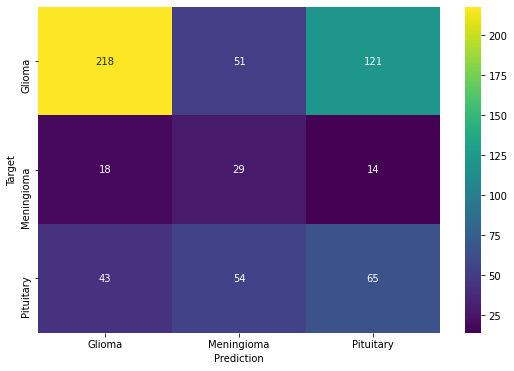


Accuracy Score: 0.5090

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.78      0.56      0.65       390
         1.0       0.22      0.48      0.30        61
         2.0       0.33      0.40      0.36       162

    accuracy                           0.51       613
   macro avg       0.44      0.48      0.44       613
weighted avg       0.60      0.51      0.54       613


Precision Score (Class-Wise): 
[0.78136201 0.21641791 0.325     ]
Average Precision Score: 0.4409266392054067

Recall Score (Class-Wise): 
[0.55897436 0.47540984 0.40123457]
Average Recall Score: 0.4785395876470558

F1 Score (Class-Wise): 
[0.65171898 0.2974359  0.35911602]
Average F1: 0.4360903010309645

Finished Training

Training Duration 0.60 minutes
GPU memory used : 103821312 kb
GPU memory cached : 4821352448 kb


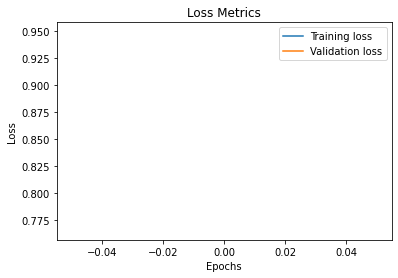

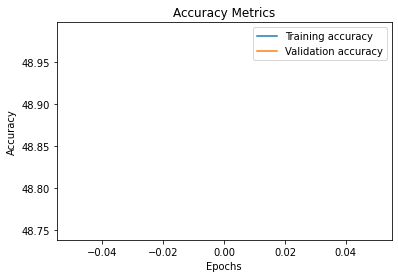

FOLD 4


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.135921  Accuracy: 31.250000%
Epoch:  1  batch:      3 [     3/77]  Loss: 1.120440  Accuracy: 43.750000%
Epoch:  1  batch:      5 [     5/77]  Loss: 1.038646  Accuracy: 44.375000%
Epoch:  1  batch:      7 [     7/77]  Loss: 1.020449  Accuracy: 44.642857%
Epoch:  1  batch:      9 [     9/77]  Loss: 1.136887  Accuracy: 43.402778%
Epoch:  1  batch:     11 [    11/77]  Loss: 1.189281  Accuracy: 40.056818%
Epoch:  1  batch:     13 [    13/77]  Loss: 1.069720  Accuracy: 39.423077%
Epoch:  1  batch:     15 [    15/77]  Loss: 1.176603  Accuracy: 41.041667%
Epoch:  1  batch:     17 [    17/77]  Loss: 1.058268  Accuracy: 41.727941%
Epoch:  1  batch:     19 [    19/77]  Loss: 1.118654  Accuracy: 42.105263%
Epoch:  1  batch:     21 [    21/77]  Loss: 1.079524  Accuracy: 42.559524%
Epoch:  1  batch:     23 [    23/77]  Loss: 0.944547  Accuracy: 43.070652%
Epoch:  1  batch:     25 [    25/77]  Loss: 1.041587  Accuracy: 43.75000

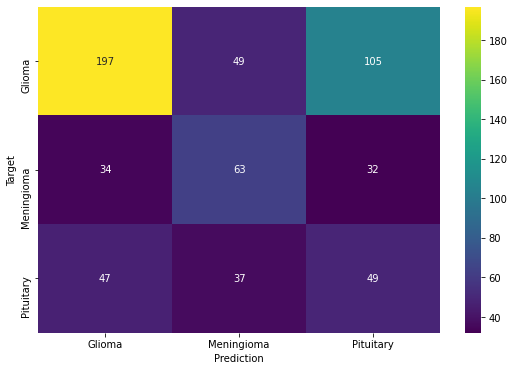


Accuracy Score: 0.5041

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.71      0.56      0.63       351
         1.0       0.42      0.49      0.45       129
         2.0       0.26      0.37      0.31       133

    accuracy                           0.50       613
   macro avg       0.46      0.47      0.46       613
weighted avg       0.55      0.50      0.52       613


Precision Score (Class-Wise): 
[0.70863309 0.42281879 0.26344086]
Average Precision Score: 0.46496424856218077

Recall Score (Class-Wise): 
[0.56125356 0.48837209 0.36842105]
Average Recall Score: 0.472682235636132

F1 Score (Class-Wise): 
[0.6263911  0.45323741 0.30721003]
Average F1: 0.4622795127997457

Finished Training

Training Duration 0.60 minutes
GPU memory used : 104017920 kb
GPU memory cached : 4821352448 kb


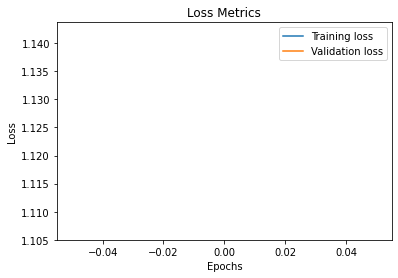

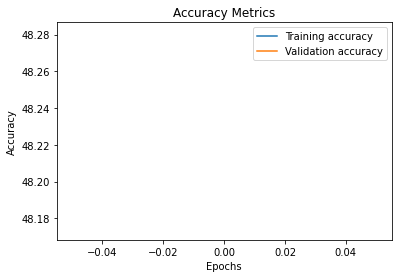

FOLD 5


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.242283  Accuracy: 34.375000%
Epoch:  1  batch:      3 [     3/77]  Loss: 1.029358  Accuracy: 39.583333%
Epoch:  1  batch:      5 [     5/77]  Loss: 0.948191  Accuracy: 45.625000%
Epoch:  1  batch:      7 [     7/77]  Loss: 1.020697  Accuracy: 45.982143%
Epoch:  1  batch:      9 [     9/77]  Loss: 1.114958  Accuracy: 42.013889%
Epoch:  1  batch:     11 [    11/77]  Loss: 1.119763  Accuracy: 39.488636%
Epoch:  1  batch:     13 [    13/77]  Loss: 1.128629  Accuracy: 39.423077%
Epoch:  1  batch:     15 [    15/77]  Loss: 1.056255  Accuracy: 40.208333%
Epoch:  1  batch:     17 [    17/77]  Loss: 1.068104  Accuracy: 41.727941%
Epoch:  1  batch:     19 [    19/77]  Loss: 1.131422  Accuracy: 41.940789%
Epoch:  1  batch:     21 [    21/77]  Loss: 0.917135  Accuracy: 43.303571%
Epoch:  1  batch:     23 [    23/77]  Loss: 0.972033  Accuracy: 44.429348%
Epoch:  1  batch:     25 [    25/77]  Loss: 0.889273  Accuracy: 45.25000

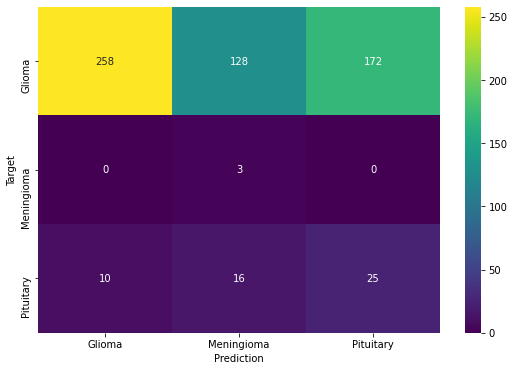


Accuracy Score: 0.4673

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.96      0.46      0.62       558
         1.0       0.02      1.00      0.04         3
         2.0       0.13      0.49      0.20        51

    accuracy                           0.47       612
   macro avg       0.37      0.65      0.29       612
weighted avg       0.89      0.47      0.59       612


Precision Score (Class-Wise): 
[0.96268657 0.02040816 0.12690355]
Average Precision Score: 0.36999942790965923

Recall Score (Class-Wise): 
[0.46236559 1.         0.49019608]
Average Recall Score: 0.650853889943074

F1 Score (Class-Wise): 
[0.62469734 0.04       0.2016129 ]
Average F1: 0.28877007992918324

Finished Training

Training Duration 0.60 minutes
GPU memory used : 103297024 kb
GPU memory cached : 4821352448 kb


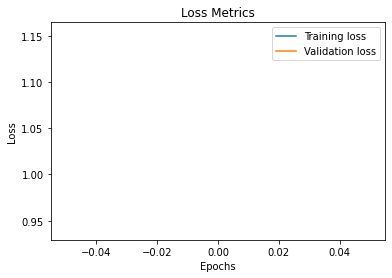

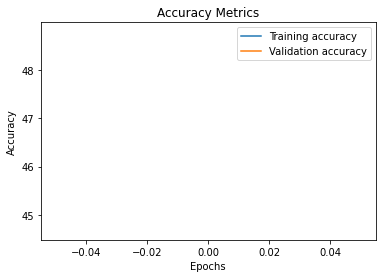

In [10]:
batch_size = 32

for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):
    # Print
    print(f'FOLD {fold+1}\n')
    
    model_name = f'resnet50_frozen_wo_aug_fold_{fold+1}' 
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      dataset, 
                      batch_size=batch_size, sampler=train_subsampler, collate_fn=plain_transform)

    testloader = torch.utils.data.DataLoader(
                      dataset,
                      batch_size=batch_size, sampler=test_subsampler, collate_fn=plain_transform)
    
    model = resnet50()
    
    for params in model.parameters():
        params.requires_grad = False

    model.fc = nn.Linear(model.fc.in_features, 3)
    
    for params in model.fc.parameters():
        params.requires_grad = True
    
    model = model.to(device)
        
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    print('\nTraining the model')
    b, test_b = 0, 0

    training_losses = []
    training_accuracies = []
    test_loss = []
    test_corr = []

    start_time = time.time()

    for epoch in range(epochs):
        e_start = time.time()

        model.train()

        running_loss = 0.0
        running_accuracy = 0.0
        tst_corr = 0.0

        for b, (X_train, y_train) in enumerate(trainloader):
            X_train, y_train = X_train.to(device), y_train.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            y_pred = model(X_train)
            
            y_pred = y_pred.view(-1, n_classes)
            
            loss = criterion(y_pred, y_train)

            predicted = torch.argmax(y_pred.data, dim=1).data
            batch_corr = (predicted == y_train).sum()
            running_accuracy += batch_corr
            
            loss.backward()
            
            optimizer.step()
            
            # print statistics
            running_loss += loss.item()

            if b % int(len(trainloader)/batch_size) == 0:
                print(f'Epoch: {epoch+1:2}  batch: {b+1:6} [{b+1:6}/{len(trainloader)}]  Loss: {loss.item():.6f}  Accuracy: {running_accuracy.item()*100/((batch_size) * (b+1)):.6f}%')
            
        training_losses.append(loss.item())
        training_accuracies.append(running_accuracy.item()*100/((batch_size) * (b+1)))

        print(f"Epoch {epoch+1} | Training Accuracy: {torch.mean(torch.tensor(training_accuracies)):.6f}% | Training Loss: {torch.mean(torch.tensor(training_losses)):.6f}")

        model.eval()
        b = 0

        with torch.no_grad():
            correct = 0
            labels = []
            pred = []

            new_y = 0.0

            # perform test set evaluation batch wise
            for b, (X, y) in enumerate(testloader):
                b += 1
                # set label to use CUDA if available
                X, y = X.to(device), y.to(device)
   
                labels.extend(y.view(-1).cpu().numpy())

                # perform forward pass
                y_val = model(X).view(-1, n_classes)

                # get argmax of predicted values, which is our label
                predicted = torch.argmax(y_val.data, dim=1).view(-1)

                # append predicted label
                pred.extend(predicted.cpu().numpy())

                # calculate loss
                loss = criterion(y_val, y)

                # increment correct with correcly predicted labels per batch
                correct += (predicted == y).sum()

            # append correct samples labels and losses
            test_corr.append(correct.item()*100/(batch_size * b))
            
            test_loss.append(loss.item())
                
        print(f"Test accuracy: {torch.mean(torch.tensor(test_corr)):.6f}% | Test Loss: {torch.mean(torch.tensor(test_loss)):.6f}")

        labels = torch.Tensor(labels)
        pred = torch.Tensor(pred)

    print("Test Metrics: \n")

    plot_confusion_matrix(pred, labels, class_names)

    a, p, p_avg, r, r_avg, f, f_avg = get_all_metrics(pred, labels)
    
    values = {'model': model_name, 'accuracy': a, 'loss': torch.mean(torch.tensor(test_loss)), 'precision_class_wise': p, 'precision_avg': p_avg, 'recall_class_wise': r, 'recall_avg': r_avg, 'f1_class_wise': f, 'f1_avg': f_avg}
    df = df.append(values, ignore_index = True)

    print('Finished Training')

    end_time = time.time() - start_time    

    # print training summary
    print("\nTraining Duration {:.2f} minutes".format(end_time/60))
    print("GPU memory used : {} kb".format(torch.cuda.memory_allocated()))
    print("GPU memory cached : {} kb".format(torch.cuda.memory_reserved()))

    plot_loss(training_losses, test_loss) 
    plot_accuracy(training_accuracies, test_corr) 

    torch.save(model.state_dict(), model_dir + '/' + model_name + f'_fold_{fold}.pt')
    df.to_csv('resnet_test_results.csv', index=False)

FOLD 1


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.086209  Accuracy: 40.625000%
Epoch:  1  batch:    154 [   154/613]  Loss: 1.500462  Accuracy: 44.521104%
Epoch:  1  batch:    307 [   307/613]  Loss: 1.048365  Accuracy: 44.187704%
Epoch:  1  batch:    460 [   460/613]  Loss: 1.237346  Accuracy: 45.149457%
Epoch:  1  batch:    613 [   613/613]  Loss: 1.031900  Accuracy: 46.502855%
Epoch 1 | Training Accuracy: 46.502853% | Training Loss: 1.031900
Test accuracy: 52.049515% | Test Loss: 1.121048
Test accuracy (wo augmentation): 50.324677% | Test Loss: 0.484553
Test Metrics: 



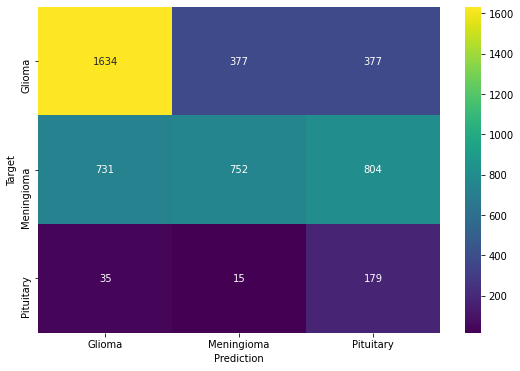


Accuracy Score: 0.5230

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.68      0.68      0.68      2388
         1.0       0.66      0.33      0.44      2287
         2.0       0.13      0.78      0.23       229

    accuracy                           0.52      4904
   macro avg       0.49      0.60      0.45      4904
weighted avg       0.64      0.52      0.55      4904


Precision Score (Class-Wise): 
[0.68083333 0.65734266 0.13161765]
Average Precision Score: 0.4899312125782714

Recall Score (Class-Wise): 
[0.68425461 0.32881504 0.78165939]
Average Recall Score: 0.5982430121835272

F1 Score (Class-Wise): 
[0.68253968 0.43835616 0.22529893]
Average F1: 0.44873159235599647



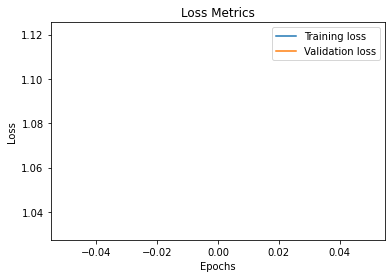

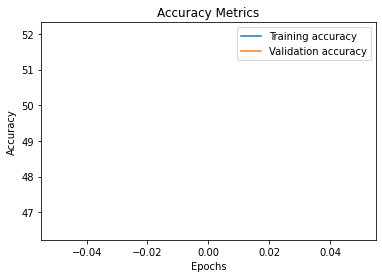

Test Metrics (wo augmentation): 



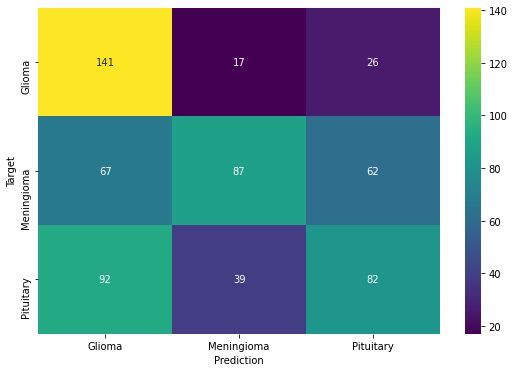


Accuracy Score: 0.5057

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.47      0.77      0.58       184
         1.0       0.61      0.40      0.48       216
         2.0       0.48      0.38      0.43       213

    accuracy                           0.51       613
   macro avg       0.52      0.52      0.50       613
weighted avg       0.52      0.51      0.49       613


Precision Score (Class-Wise): 
[0.47       0.60839161 0.48235294]
Average Precision Score: 0.5202481831893597

Recall Score (Class-Wise): 
[0.76630435 0.40277778 0.38497653]
Average Recall Score: 0.5180195504751536

F1 Score (Class-Wise): 
[0.58264463 0.48467967 0.42819843]
Average F1: 0.4985075757525668



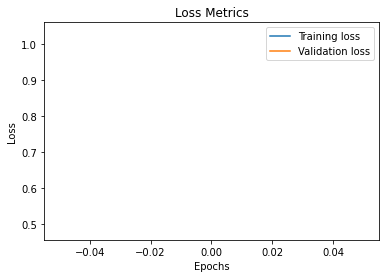

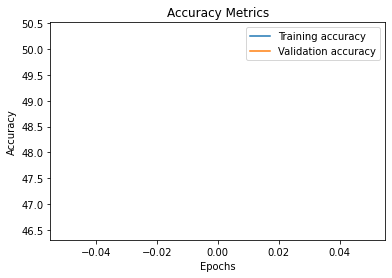

Finished Training

Training Duration 2.70 minutes
GPU memory used : 115027968 kb
GPU memory cached : 4821352448 kb

FOLD 2


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 0.552589  Accuracy: 100.000000%
Epoch:  1  batch:    154 [   154/613]  Loss: 1.101865  Accuracy: 42.288961%
Epoch:  1  batch:    307 [   307/613]  Loss: 0.717787  Accuracy: 43.505700%
Epoch:  1  batch:    460 [   460/613]  Loss: 0.921144  Accuracy: 44.680707%
Epoch:  1  batch:    613 [   613/613]  Loss: 1.987209  Accuracy: 45.549551%
Epoch 1 | Training Accuracy: 45.549553% | Training Loss: 1.987209
Test accuracy: 47.686687% | Test Loss: 0.477725
Test accuracy (wo augmentation): 39.772728% | Test Loss: 2.101765
Test Metrics: 



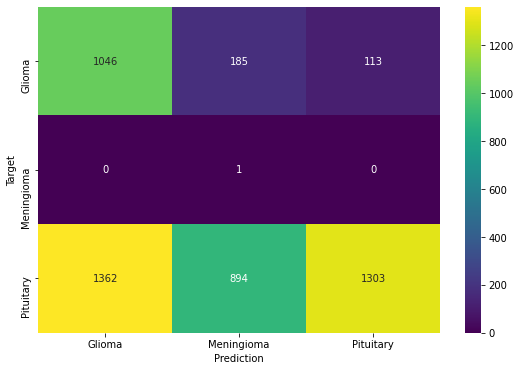


Accuracy Score: 0.4792

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.43      0.78      0.56      1344
         1.0       0.00      1.00      0.00         1
         2.0       0.92      0.37      0.52      3559

    accuracy                           0.48      4904
   macro avg       0.45      0.71      0.36      4904
weighted avg       0.79      0.48      0.53      4904


Precision Score (Class-Wise): 
[0.43438538 0.00092593 0.92019774]
Average Precision Score: 0.45183634936624034

Recall Score (Class-Wise): 
[0.77827381 1.         0.36611408]
Average Recall Score: 0.7147959621705758

F1 Score (Class-Wise): 
[0.5575693  0.00185014 0.5238191 ]
Average F1: 0.3610795102043536



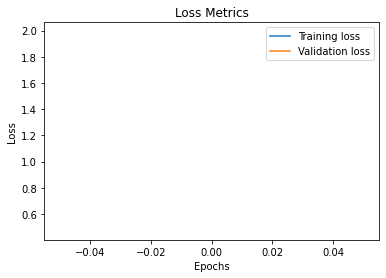

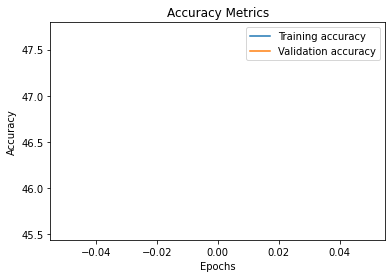

Test Metrics (wo augmentation): 



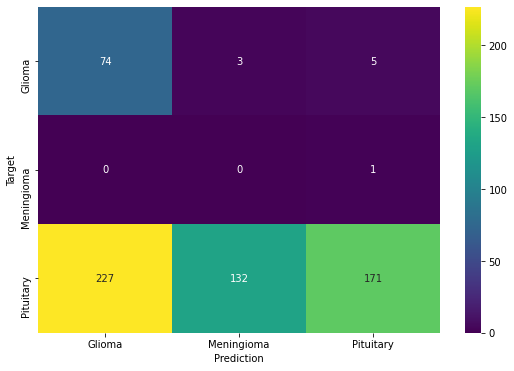


Accuracy Score: 0.3997

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.25      0.90      0.39        82
         1.0       0.00      0.00      0.00         1
         2.0       0.97      0.32      0.48       530

    accuracy                           0.40       613
   macro avg       0.40      0.41      0.29       613
weighted avg       0.87      0.40      0.47       613


Precision Score (Class-Wise): 
[0.24584718 0.         0.96610169]
Average Precision Score: 0.4039829569983295

Recall Score (Class-Wise): 
[0.90243902 0.         0.32264151]
Average Recall Score: 0.40836017794140206

F1 Score (Class-Wise): 
[0.38642298 0.         0.48373409]
Average F1: 0.29005235473192975



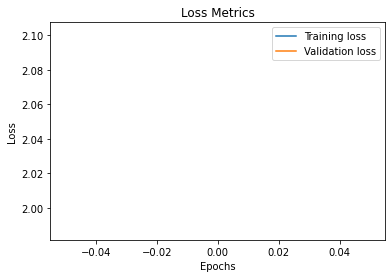

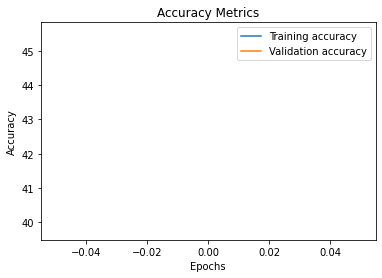

Finished Training

Training Duration 2.71 minutes
GPU memory used : 116338688 kb
GPU memory cached : 4821352448 kb

FOLD 3


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.302825  Accuracy: 25.000000%
Epoch:  1  batch:    154 [   154/613]  Loss: 1.036395  Accuracy: 43.222403%
Epoch:  1  batch:    307 [   307/613]  Loss: 0.675252  Accuracy: 45.246336%
Epoch:  1  batch:    460 [   460/613]  Loss: 1.317642  Accuracy: 47.493207%
Epoch:  1  batch:    613 [   613/613]  Loss: 0.451803  Accuracy: 48.011827%
Epoch 1 | Training Accuracy: 48.011826% | Training Loss: 0.451803
Test accuracy: 47.686687% | Test Loss: 2.445097
Test accuracy (wo augmentation): 49.025974% | Test Loss: 0.404357
Test Metrics: 



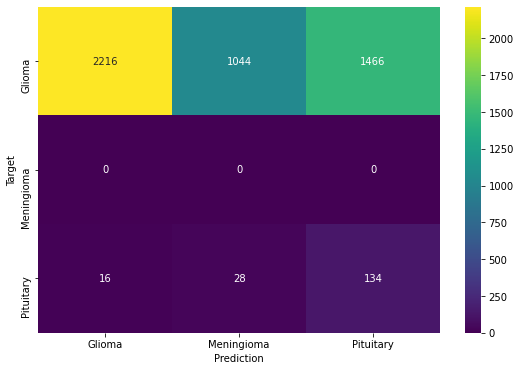


Accuracy Score: 0.4792

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.99      0.47      0.64      4726
         1.0       0.00      0.00      0.00         0
         2.0       0.08      0.75      0.15       178

    accuracy                           0.48      4904
   macro avg       0.36      0.41      0.26      4904
weighted avg       0.96      0.48      0.62      4904


Precision Score (Class-Wise): 
[0.99283154 0.         0.08375   ]
Average Precision Score: 0.358860513739546

Recall Score (Class-Wise): 
[0.46889547 0.         0.75280899]
Average Recall Score: 0.40723482020728424

F1 Score (Class-Wise): 
[0.63696465 0.         0.15073116]
Average F1: 0.26256526787270307



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


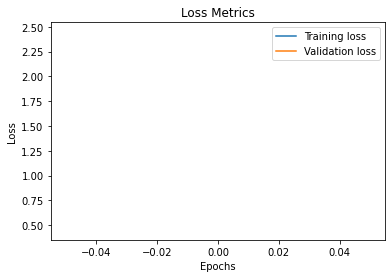

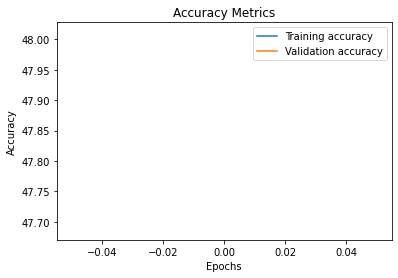

Test Metrics (wo augmentation): 



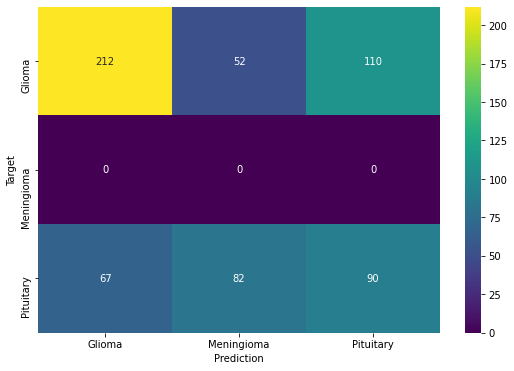


Accuracy Score: 0.4927

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.76      0.57      0.65       374
         1.0       0.00      0.00      0.00         0
         2.0       0.45      0.38      0.41       239

    accuracy                           0.49       613
   macro avg       0.40      0.31      0.35       613
weighted avg       0.64      0.49      0.56       613


Precision Score (Class-Wise): 
[0.75985663 0.         0.45      ]
Average Precision Score: 0.40328554360812424

Recall Score (Class-Wise): 
[0.56684492 0.         0.37656904]
Average Recall Score: 0.3144713191476667

F1 Score (Class-Wise): 
[0.64931087 0.         0.41002278]
Average F1: 0.353111217312538



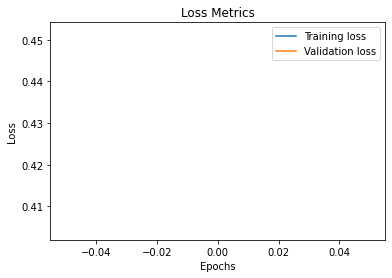

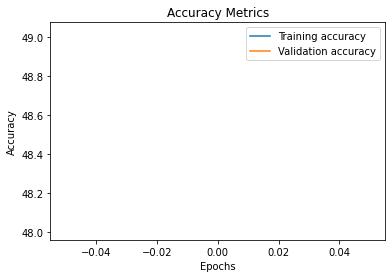

Finished Training

Training Duration 2.73 minutes
GPU memory used : 114241536 kb
GPU memory cached : 4821352448 kb

FOLD 4


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.278025  Accuracy: 0.000000%
Epoch:  1  batch:    154 [   154/613]  Loss: 1.012781  Accuracy: 42.410714%
Epoch:  1  batch:    307 [   307/613]  Loss: 2.010894  Accuracy: 43.414088%
Epoch:  1  batch:    460 [   460/613]  Loss: 0.761078  Accuracy: 44.252717%
Epoch:  1  batch:    613 [   613/613]  Loss: 0.712391  Accuracy: 45.585237%
Epoch 1 | Training Accuracy: 45.585236% | Training Loss: 0.712391
Test accuracy: 49.228897% | Test Loss: 1.959269
Test accuracy (wo augmentation): 50.000000% | Test Loss: 0.943709
Test Metrics: 



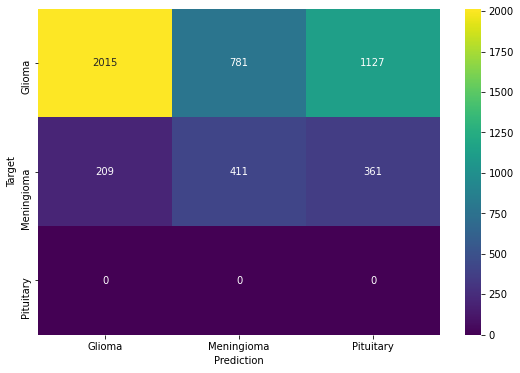


Accuracy Score: 0.4947

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.91      0.51      0.66      3923
         1.0       0.34      0.42      0.38       981
         2.0       0.00      0.00      0.00         0

    accuracy                           0.49      4904
   macro avg       0.42      0.31      0.34      4904
weighted avg       0.79      0.49      0.60      4904


Precision Score (Class-Wise): 
[0.90602518 0.34479866 0.        ]
Average Precision Score: 0.41694127919141194

Recall Score (Class-Wise): 
[0.51363752 0.41896024 0.        ]
Average Recall Score: 0.310865922317559

F1 Score (Class-Wise): 
[0.65560436 0.37827888 0.        ]
Average F1: 0.3446277456595757



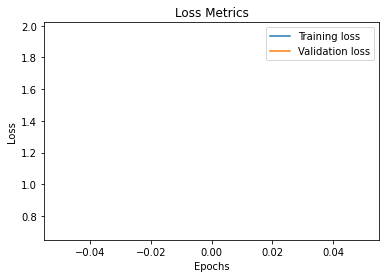

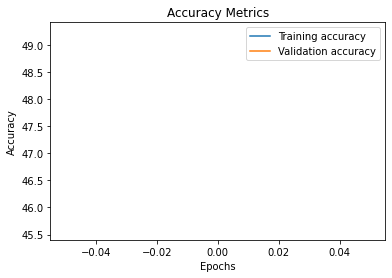

Test Metrics (wo augmentation): 



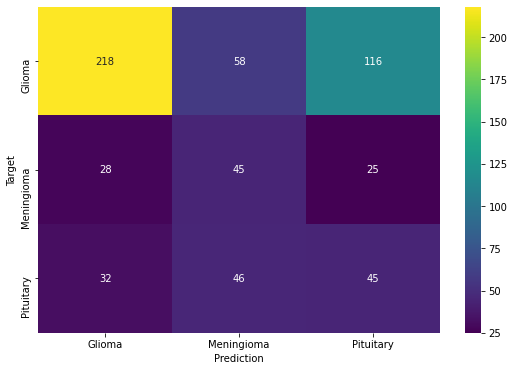


Accuracy Score: 0.5024

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.78      0.56      0.65       392
         1.0       0.30      0.46      0.36        98
         2.0       0.24      0.37      0.29       123

    accuracy                           0.50       613
   macro avg       0.44      0.46      0.44       613
weighted avg       0.60      0.50      0.53       613


Precision Score (Class-Wise): 
[0.78417266 0.30201342 0.24193548]
Average Precision Score: 0.4427071895200878

Recall Score (Class-Wise): 
[0.55612245 0.45918367 0.36585366]
Average Recall Score: 0.46038659366185497

F1 Score (Class-Wise): 
[0.65074627 0.36437247 0.29126214]
Average F1: 0.43546029140489134



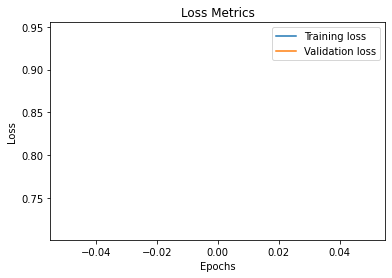

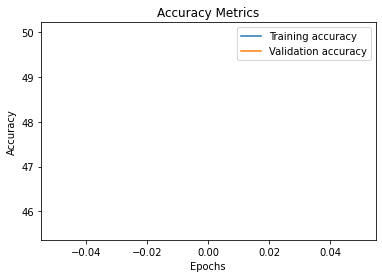

Finished Training

Training Duration 2.72 minutes
GPU memory used : 116076544 kb
GPU memory cached : 4821352448 kb

FOLD 5


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.054532  Accuracy: 50.000000%
Epoch:  1  batch:    154 [   154/613]  Loss: 0.950593  Accuracy: 45.758929%
Epoch:  1  batch:    307 [   307/613]  Loss: 0.674667  Accuracy: 46.834283%
Epoch:  1  batch:    460 [   460/613]  Loss: 1.179214  Accuracy: 45.672554%
Epoch:  1  batch:    613 [   613/613]  Loss: 0.904674  Accuracy: 46.212276%
Epoch 1 | Training Accuracy: 46.212276% | Training Loss: 0.904674
Test accuracy: 47.630718% | Test Loss: 1.025340
Test accuracy (wo augmentation): 53.921570% | Test Loss: 0.955792
Test Metrics: 



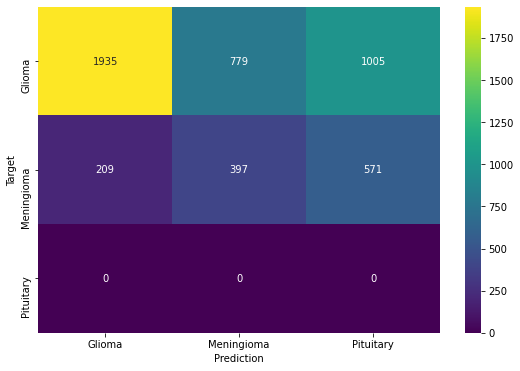


Accuracy Score: 0.4763

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.90      0.52      0.66      3719
         1.0       0.34      0.34      0.34      1177
         2.0       0.00      0.00      0.00         0

    accuracy                           0.48      4896
   macro avg       0.41      0.29      0.33      4896
weighted avg       0.77      0.48      0.58      4896


Precision Score (Class-Wise): 
[0.90251866 0.33758503 0.        ]
Average Precision Score: 0.4133678969100078

Recall Score (Class-Wise): 
[0.52030116 0.33729822 0.        ]
Average Recall Score: 0.28586645734256005

F1 Score (Class-Wise): 
[0.66007164 0.33744156 0.        ]
Average F1: 0.33250439988076425



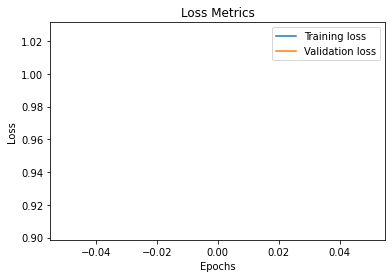

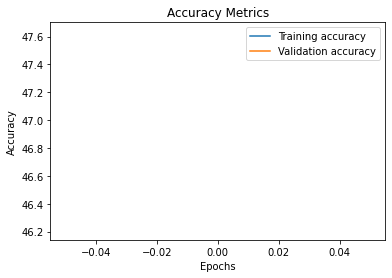

Test Metrics (wo augmentation): 



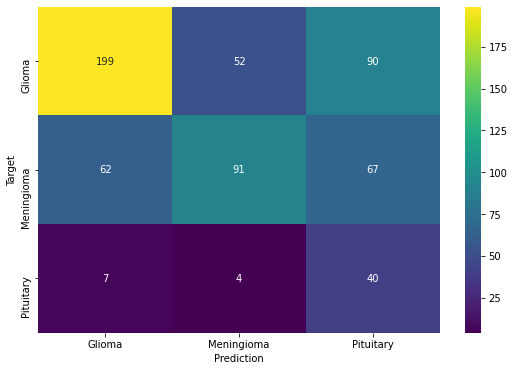


Accuracy Score: 0.5392

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.74      0.58      0.65       341
         1.0       0.62      0.41      0.50       220
         2.0       0.20      0.78      0.32        51

    accuracy                           0.54       612
   macro avg       0.52      0.59      0.49       612
weighted avg       0.65      0.54      0.57       612


Precision Score (Class-Wise): 
[0.74253731 0.61904762 0.20304569]
Average Precision Score: 0.5215435392532142

Recall Score (Class-Wise): 
[0.58357771 0.41363636 0.78431373]
Average Recall Score: 0.5938426005788435

F1 Score (Class-Wise): 
[0.65353038 0.49591281 0.32258065]
Average F1: 0.4906746097897028



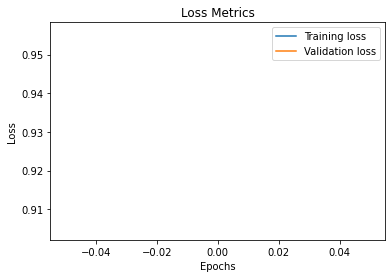

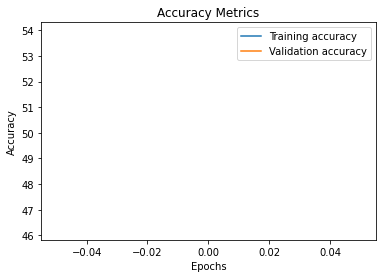

Finished Training

Training Duration 2.72 minutes
GPU memory used : 121647104 kb
GPU memory cached : 4821352448 kb



In [11]:
batch_size = 4 # generates 7 new images + original image - per image, 4 * 8 = 32 images per batch

for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):
    # Print
    print(f'FOLD {fold+1}\n')
    
    model_name = f'resnet50_frozen_w_aug_fold_{fold+1}' 
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      dataset, 
                      batch_size=batch_size, sampler=train_subsampler, collate_fn=augmentor)

    testloader = torch.utils.data.DataLoader(
                      dataset,
                      batch_size=batch_size, sampler=test_subsampler, collate_fn=augmentor)
    
    testloader_plain = torch.utils.data.DataLoader(
                      dataset,
                      batch_size=batch_size, sampler=test_subsampler, collate_fn=plain_transform)
    
    model = resnet50()

    for params in model.parameters():
        params.requires_grad = False

    model.fc = nn.Linear(model.fc.in_features, 3)
    
    for params in model.fc.parameters():
        params.requires_grad = True
    
    model = model.to(device)
        
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    print('\nTraining the model')
    b, test_b = 0, 0

    training_losses = []
    training_accuracies = []
    test_loss = []
    test_corr = []
    test_corr_a = []
    test_loss_a = []

    start_time = time.time()

    for epoch in range(epochs):
        e_start = time.time()

        model.train()

        running_loss = 0.0
        running_accuracy = 0.0
        tst_corr = 0.0

        for b, (X_train, y_train) in enumerate(trainloader):
            X_train, y_train = X_train.to(device), y_train.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            y_pred = model(X_train)
            
            y_pred = y_pred.view(-1, n_classes)
            
            loss = criterion(y_pred, y_train)

            predicted = torch.argmax(y_pred.data, dim=1).data
            batch_corr = (predicted == y_train).sum()
            running_accuracy += batch_corr
            
            loss.backward()
            
            optimizer.step()
            
            # print statistics
            running_loss += loss.item()

            if b % int(len(trainloader)/batch_size) == 0:
                print(f'Epoch: {epoch+1:2}  batch: {b+1:6} [{b+1:6}/{len(trainloader)}]  Loss: {loss.item():.6f}  Accuracy: {running_accuracy.item()*100/((batch_size * 8) * (b+1)):.6f}%')
            
        training_losses.append(loss.item())
        training_accuracies.append(running_accuracy.item()*100/((batch_size * 8) * (b+1)))

        print(f"Epoch {epoch+1} | Training Accuracy: {torch.mean(torch.tensor(training_accuracies)):.6f}% | Training Loss: {torch.mean(torch.tensor(training_losses)):.6f}")

        model.eval()
        b = 0

        with torch.no_grad():
            correct = 0
            labels = []
            pred = []

            new_y = 0.0

            # perform test set evaluation batch wise
            for b, (X, y) in enumerate(testloader):
                b += 1
                # set label to use CUDA if available
                X, y = X.to(device), y.to(device)
   
                labels.extend(y.view(-1).cpu().numpy())

                # perform forward pass
                y_val = model(X).view(-1, n_classes)

                # get argmax of predicted values, which is our label
                predicted = torch.argmax(y_val.data, dim=1).view(-1)

                # append predicted label
                pred.extend(predicted.cpu().numpy())

                # calculate loss
                loss = criterion(y_val, y)

                # increment correct with correcly predicted labels per batch
                correct += (predicted == y).sum()

            # append correct samples labels and losses
            test_corr.append(correct.item()*100/(batch_size * 8 * b))
            
            test_loss.append(loss.item())
                
        print(f"Test accuracy: {torch.mean(torch.tensor(test_corr)):.6f}% | Test Loss: {torch.mean(torch.tensor(test_loss)):.6f}")

        labels = torch.Tensor(labels)
        pred = torch.Tensor(pred)

        with torch.no_grad():
          correct = 0
          labels_a = []
          pred_a = []

          new_y = 0.0

          # perform test set evaluation batch wise
          for b, (X, y) in enumerate(testloader_plain):
              b += 1
              # set label to use CUDA if available
              X, y = X.to(device), y.to(device)

              labels_a.extend(y.view(-1).cpu().numpy())

              # perform forward pass
              y_val = model(X).view(-1, n_classes)

              # get argmax of predicted values, which is our label
              predicted = torch.argmax(y_val.data, dim=1).view(-1)

              # append predicted label
              pred_a.extend(predicted.cpu().numpy())

              # calculate loss
              loss = criterion(y_val, y)

              # increment correct with correcly predicted labels per batch
              correct += (predicted == y).sum()

          # append correct samples labels and losses
          test_corr_a.append(correct.item()*100/(batch_size * b))

          test_loss_a.append(loss.item())

        labels_a = torch.Tensor(labels_a)
        pred_a = torch.Tensor(pred_a)

        print(f"Test accuracy (wo augmentation): {torch.mean(torch.tensor(test_corr_a)):.6f}% | Test Loss: {torch.mean(torch.tensor(test_loss_a)):.6f}")

    print("Test Metrics: \n")

    plot_confusion_matrix(pred, labels, class_names)

    a, p, p_avg, r, r_avg, f, f_avg = get_all_metrics(pred, labels)
    
    values = {'model': model_name, 'accuracy': a, 'loss': torch.mean(torch.tensor(test_loss)), 'precision_class_wise': p, 'precision_avg': p_avg, 'recall_class_wise': r, 'recall_avg': r_avg, 'f1_class_wise': f, 'f1_avg': f_avg}
    df = df.append(values, ignore_index = True)

    plot_loss(training_losses, test_loss) 
    plot_accuracy(training_accuracies, test_corr)
       
    print("Test Metrics (wo augmentation): \n")

    plot_confusion_matrix(pred_a, labels_a, class_names)

    a, p, p_avg, r, r_avg, f, f_avg = get_all_metrics(pred_a, labels_a)
    
    values = {'model': model_name + '_test_plain', 'accuracy': a, 'loss': torch.mean(torch.tensor(test_loss_a)), 'precision_class_wise': p, 'precision_avg': p_avg, 'recall_class_wise': r, 'recall_avg': r_avg, 'f1_class_wise': f, 'f1_avg': f_avg}
    df = df.append(values, ignore_index = True)

    plot_loss(training_losses, test_loss_a) 
    plot_accuracy(training_accuracies, test_corr_a)
    
    print('Finished Training')

    end_time = time.time() - start_time    

    # print training summary
    print("\nTraining Duration {:.2f} minutes".format(end_time/60))
    print("GPU memory used : {} kb".format(torch.cuda.memory_allocated()))
    print("GPU memory cached : {} kb\n".format(torch.cuda.memory_reserved()))

    torch.save(model.state_dict(), model_dir + '/' + model_name + f'_fold_{fold}.pt')
    df.to_csv('resnet_test_results.csv', index=False)